# Extract the graphs that are being used in the benchmarks

In [ ]:
# add parent directory to path
import sys
sys.path.append('..')

import benchmark_utils

import t2ebm
from t2ebm import graphs
from t2ebm import prompts

### plot the different graphs

California-Housing longitude
California-Housing latitude
California-Housing housing_median_age
California-Housing total_rooms
California-Housing total_bedrooms
California-Housing population
California-Housing households
California-Housing median_income
California-Housing ocean_proximity
OpenML-Diabetes Pregnancies
OpenML-Diabetes Glucose
OpenML-Diabetes BloodPressure
OpenML-Diabetes SkinThickness
OpenML-Diabetes Insulin
OpenML-Diabetes BMI
OpenML-Diabetes DiabetesPedigreeFunction
OpenML-Diabetes Age
Iris sepal_length
Iris sepal_width
Iris petal_length
Iris petal_width
Titanic Pclass
Titanic Sex


/home/sebastian/Documents/GitHub/TalkToEBM/t2ebm/graphs.py:147: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


Titanic Age
Titanic SibSp
Titanic Parch
Titanic Fare
Titanic Embarked
Spaceship-Titanic HomePlanet
Spaceship-Titanic CryoSleep
Spaceship-Titanic Cabin
Spaceship-Titanic Destination
Spaceship-Titanic Age
Spaceship-Titanic VIP
Spaceship-Titanic RoomService
Spaceship-Titanic FoodCourt
Spaceship-Titanic ShoppingMall
Spaceship-Titanic Spa
Spaceship-Titanic VRDeck
Adult-Income Age
Adult-Income WorkClass
Adult-Income Education
Adult-Income EducationNum
Adult-Income MaritalStatus
Adult-Income Occupation
Adult-Income Relationship
Adult-Income Race
Adult-Income Gender
Adult-Income CapitalGain
Adult-Income CapitalLoss
Adult-Income HoursPerWeek
Adult-Income NativeCountry
Kaggle-Flood id
Kaggle-Flood MonsoonIntensity
Kaggle-Flood TopographyDrainage
Kaggle-Flood RiverManagement
Kaggle-Flood Deforestation
Kaggle-Flood Urbanization
Kaggle-Flood ClimateChange
Kaggle-Flood DamsQuality
Kaggle-Flood Siltation
Kaggle-Flood AgriculturalPractices
Kaggle-Flood Encroachments
Kaggle-Flood IneffectiveDisasterPre

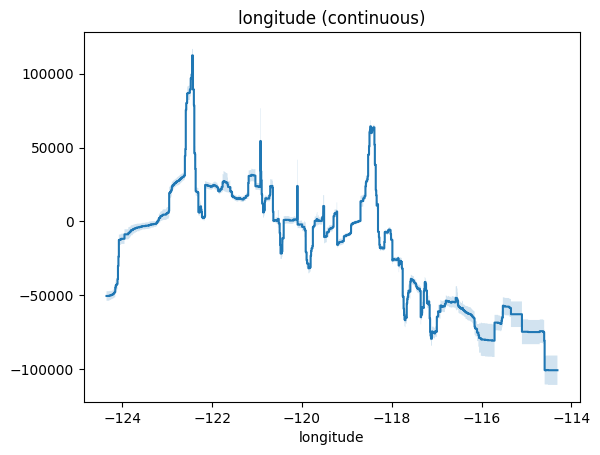

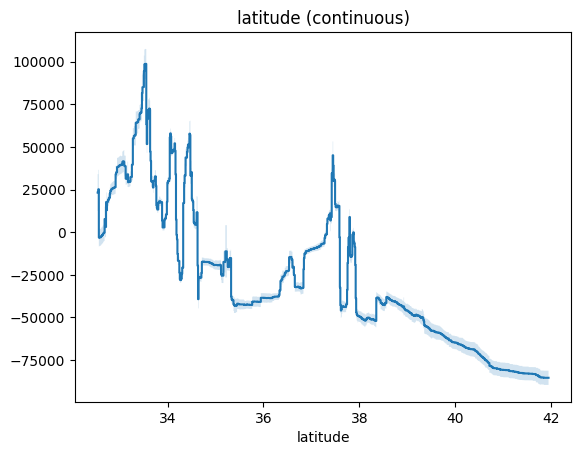

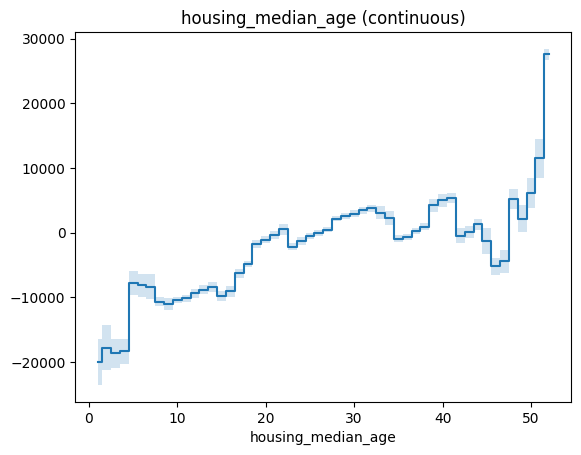

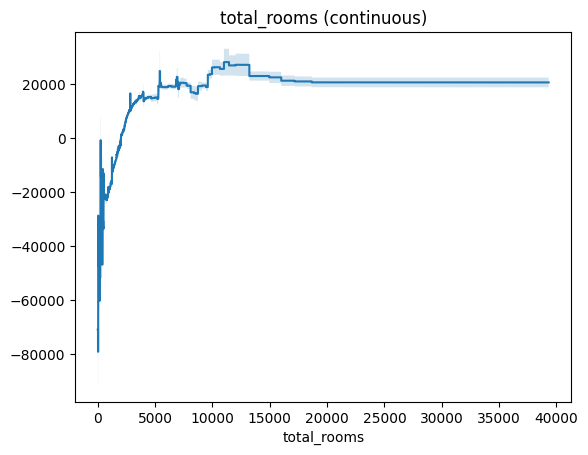

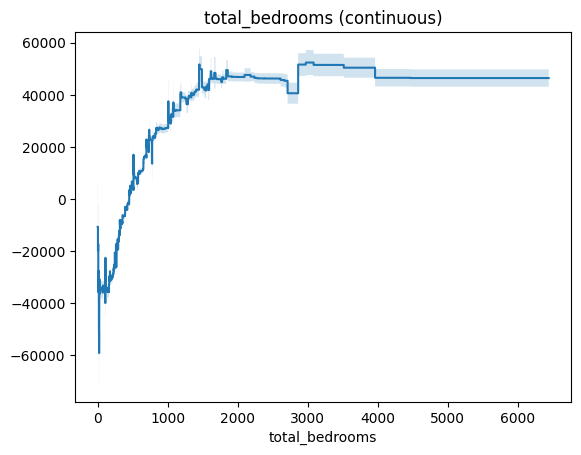

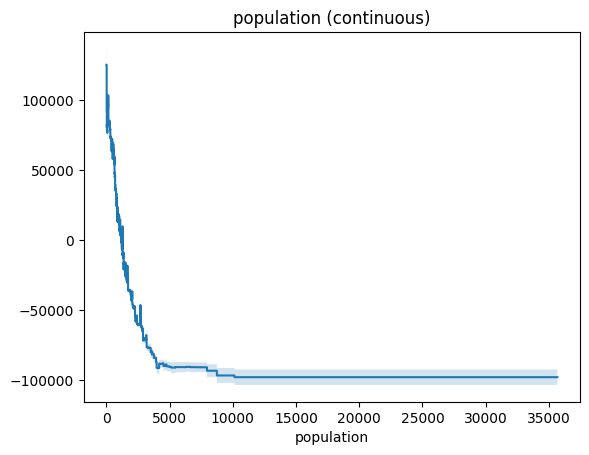

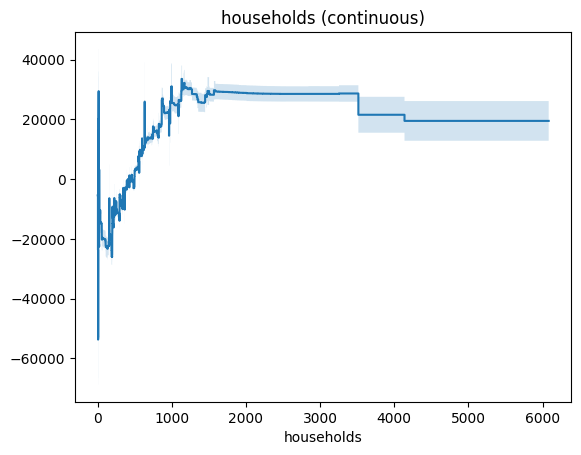

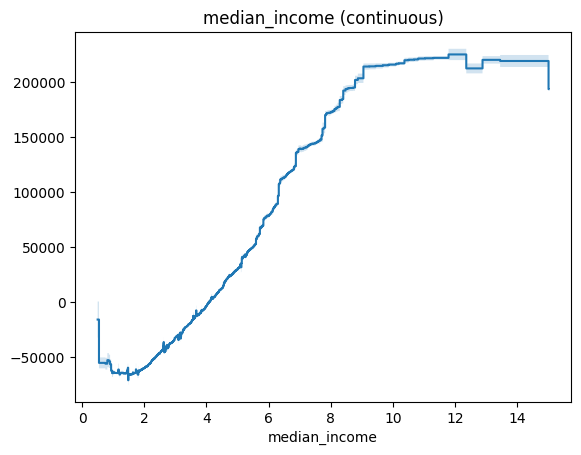

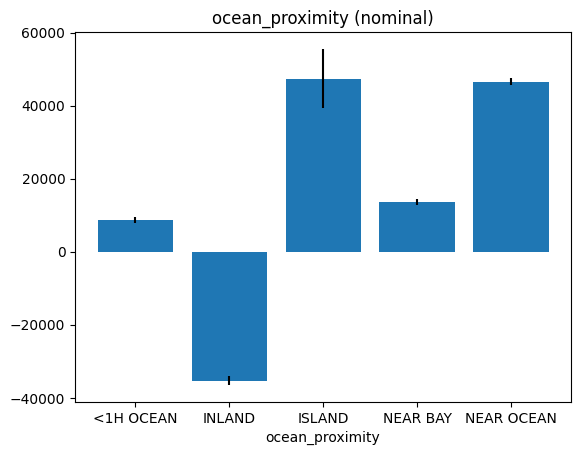

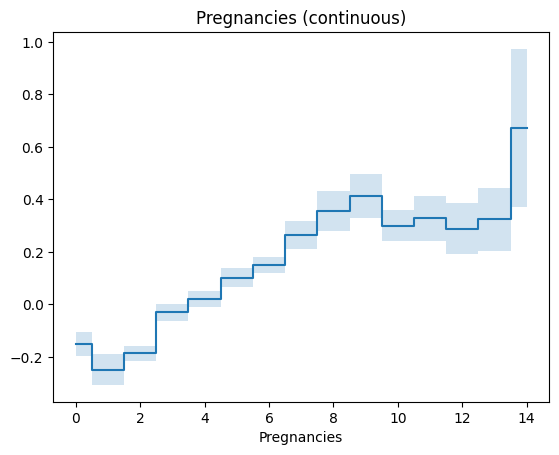

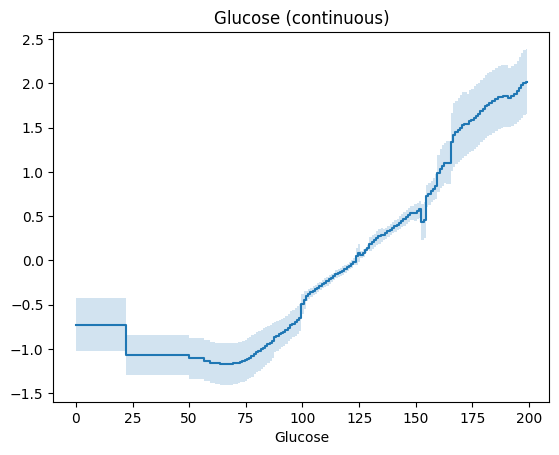

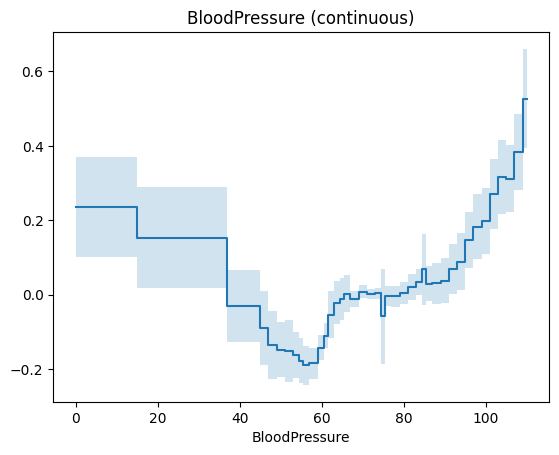

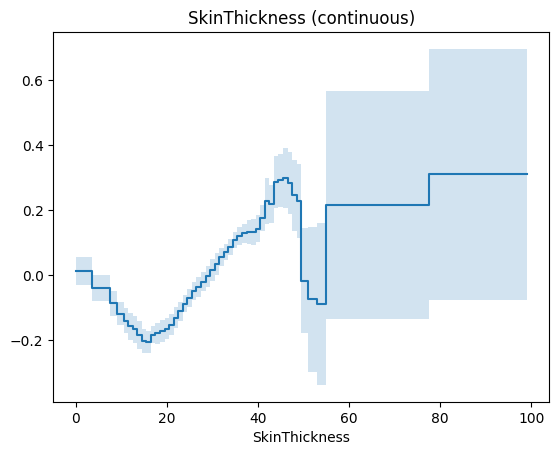

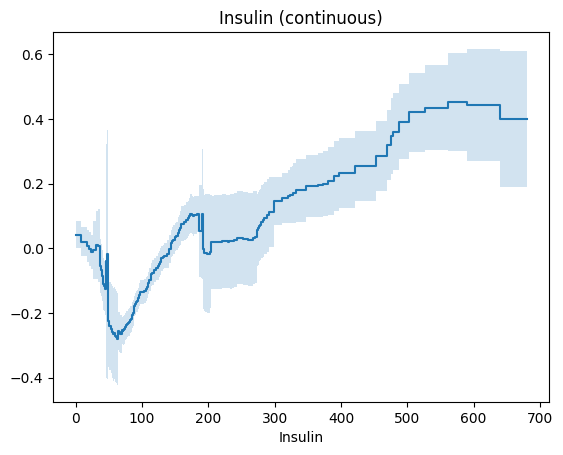

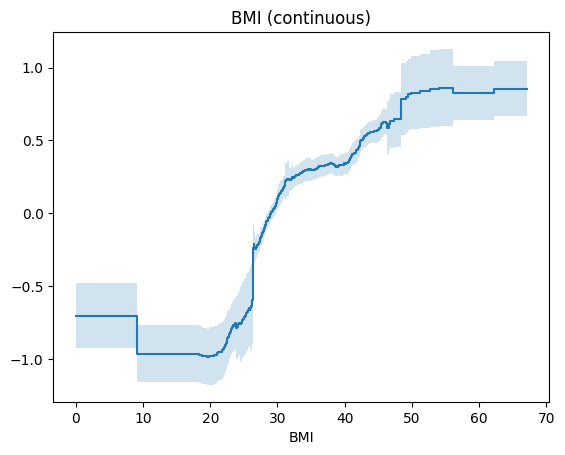

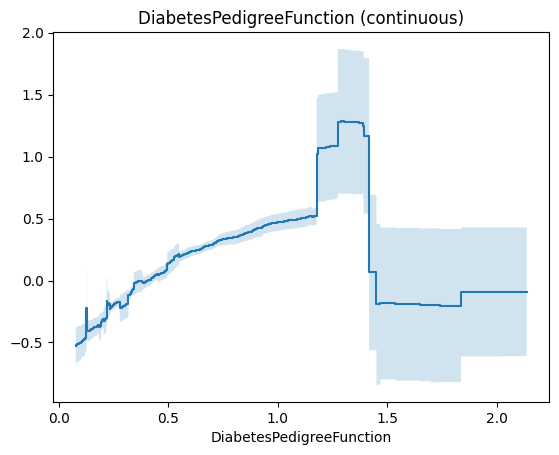

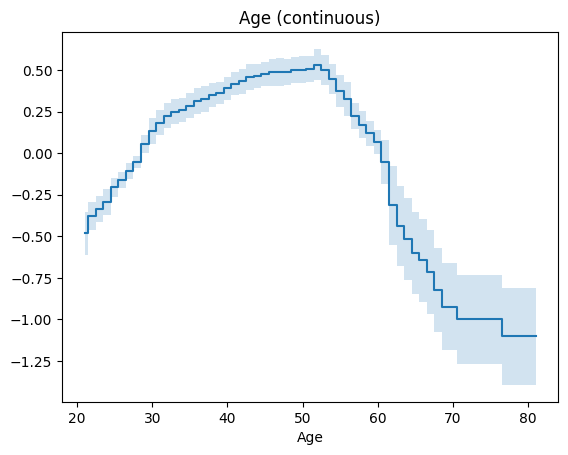

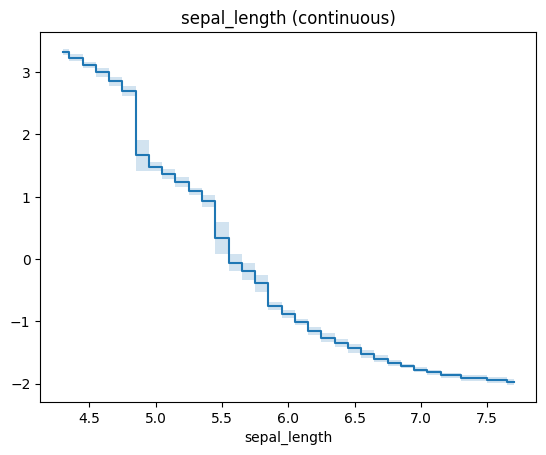

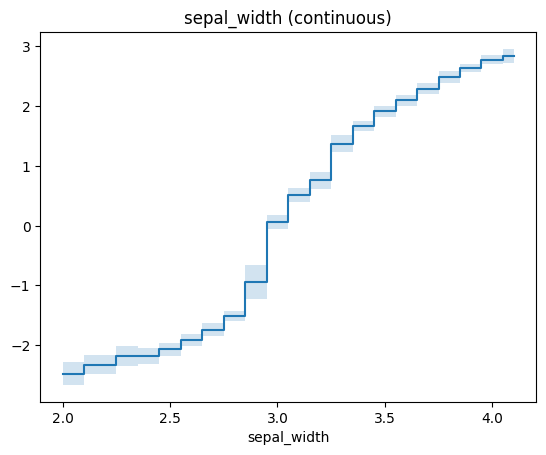

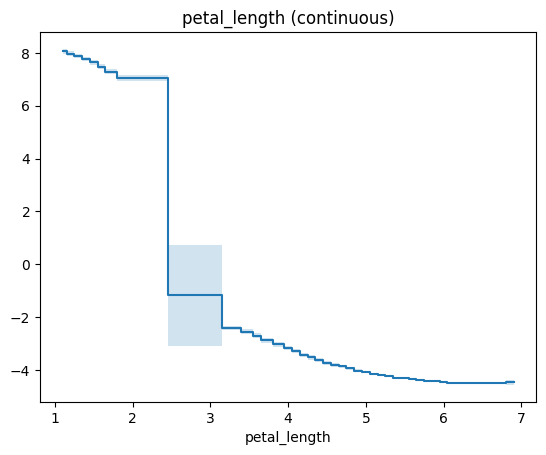

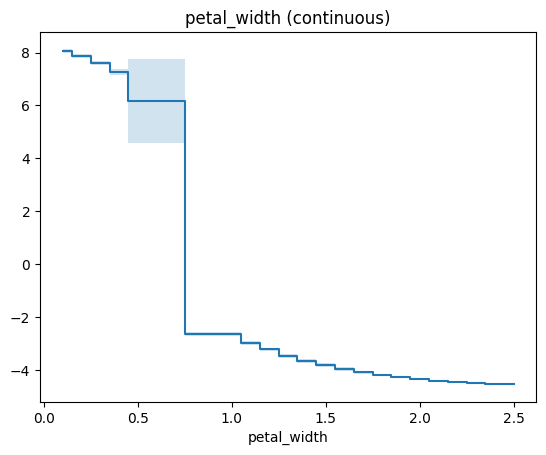

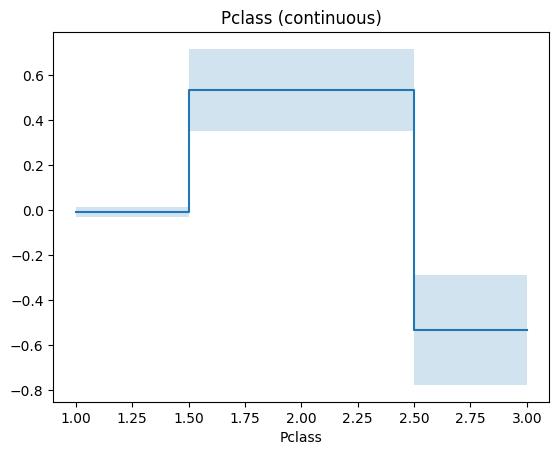

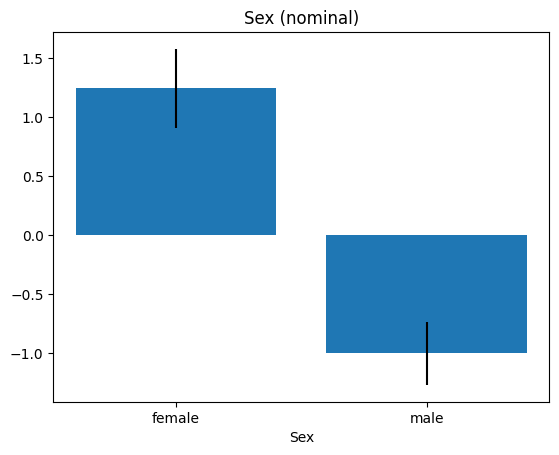

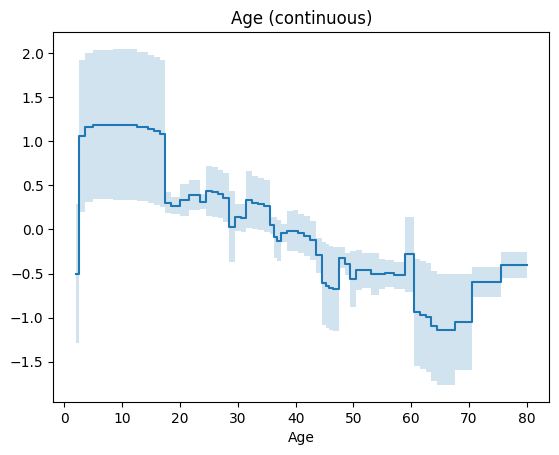

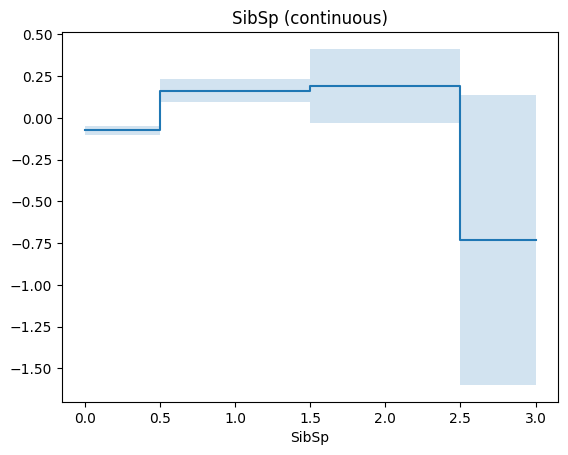

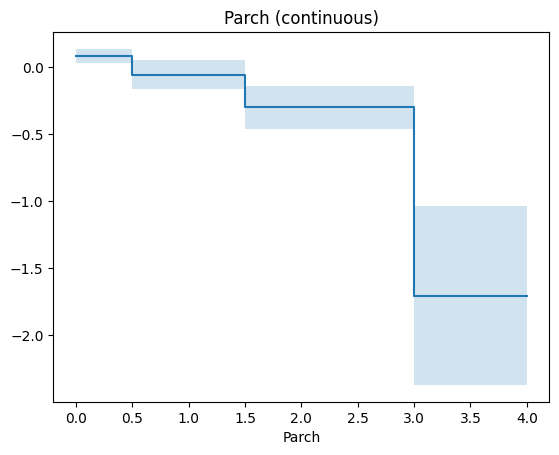

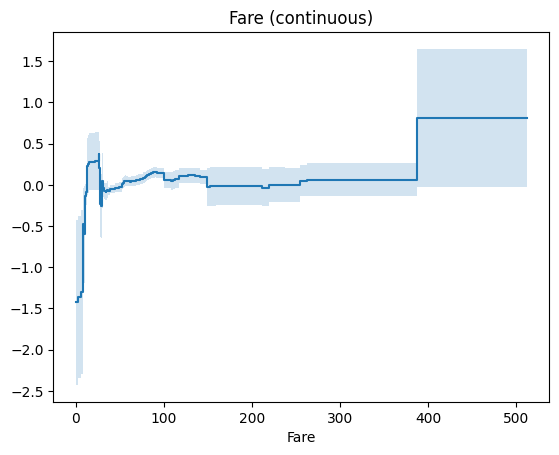

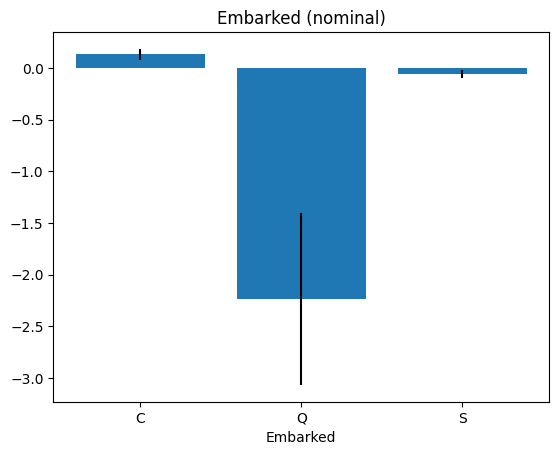

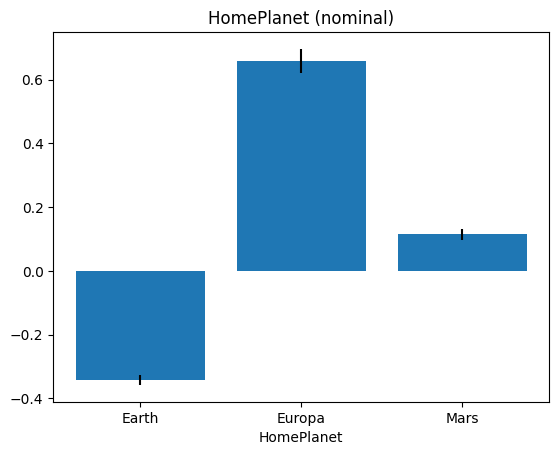

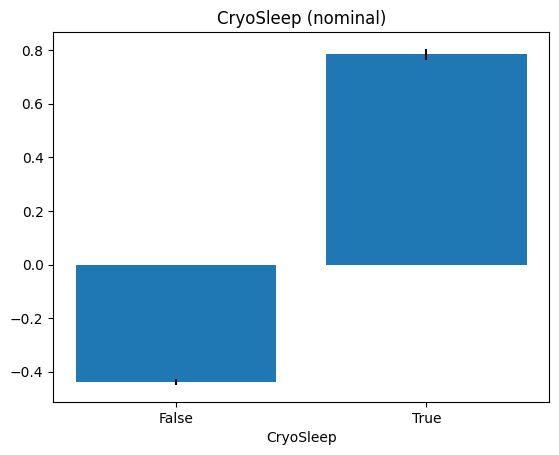

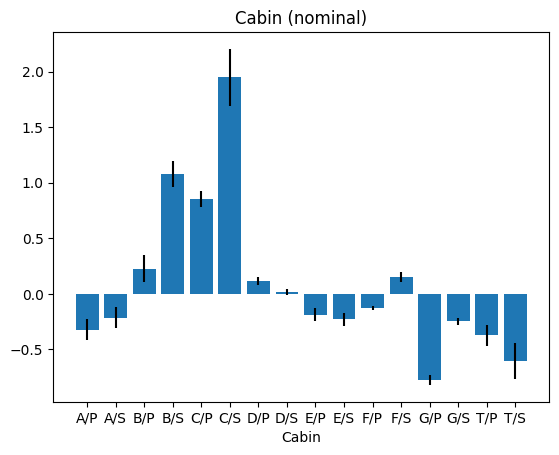

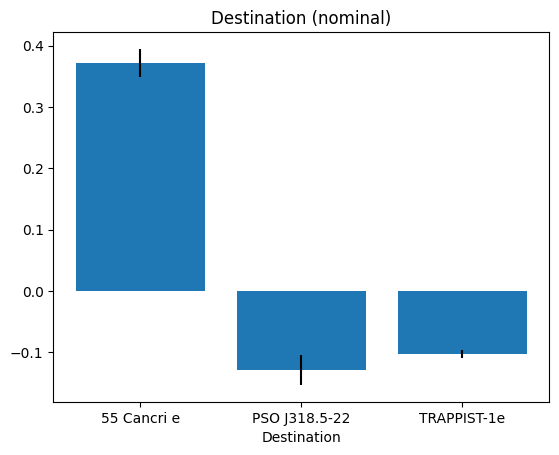

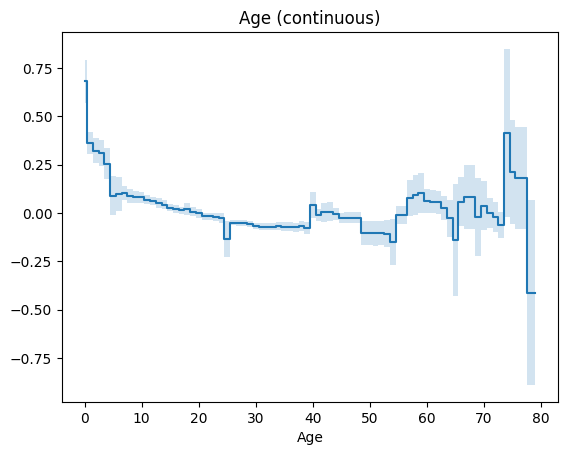

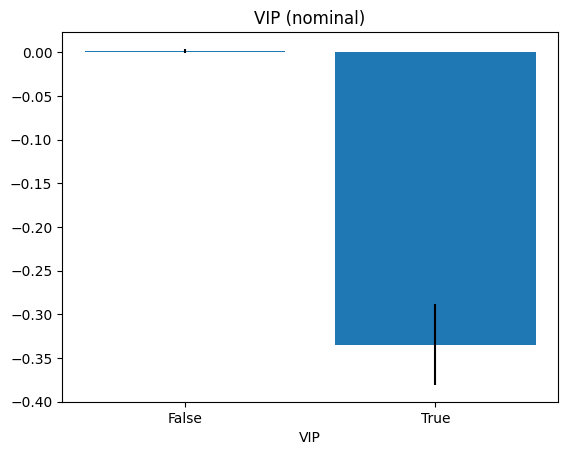

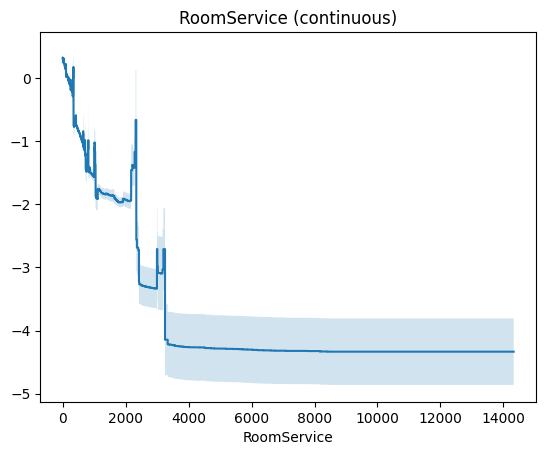

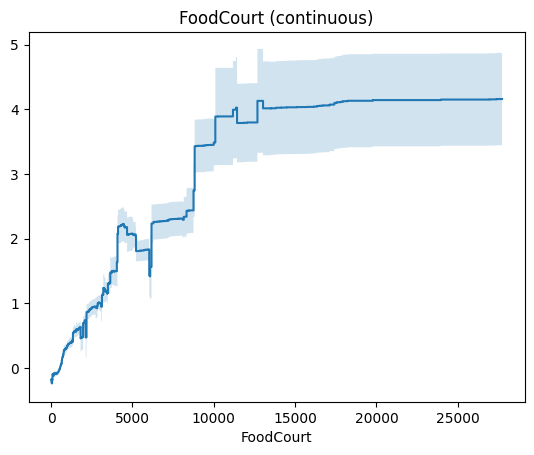

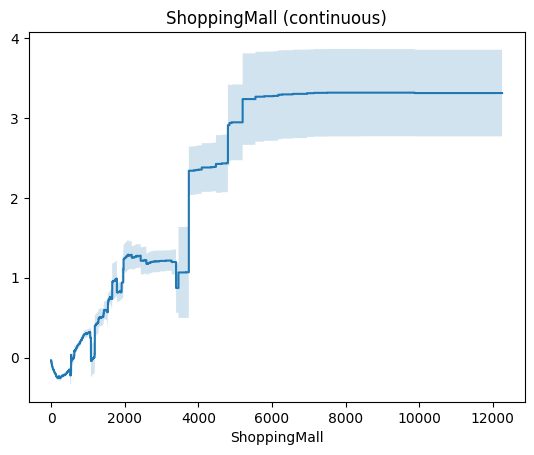

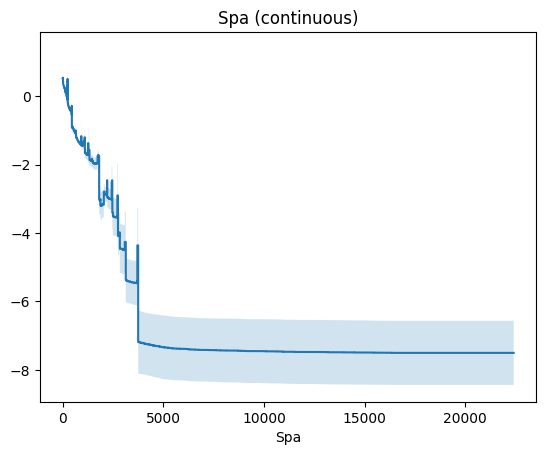

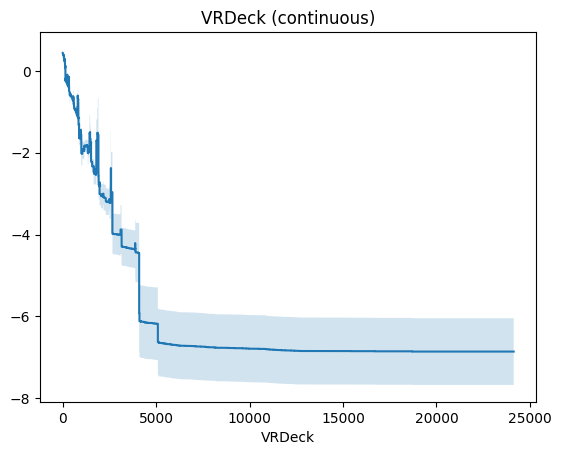

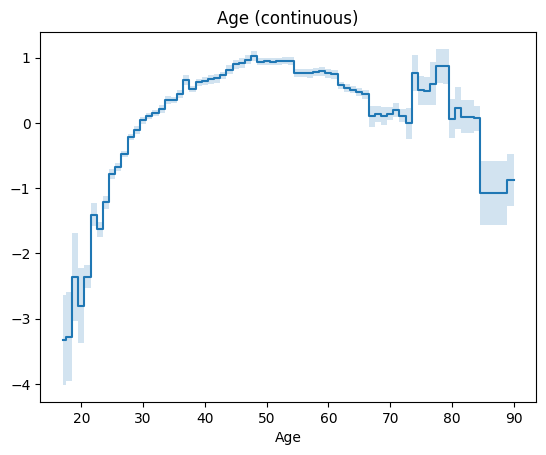

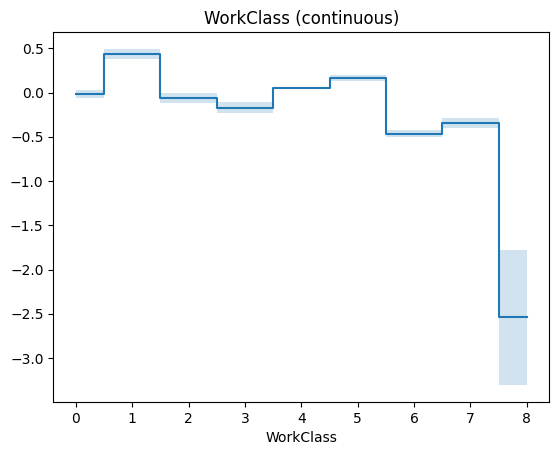

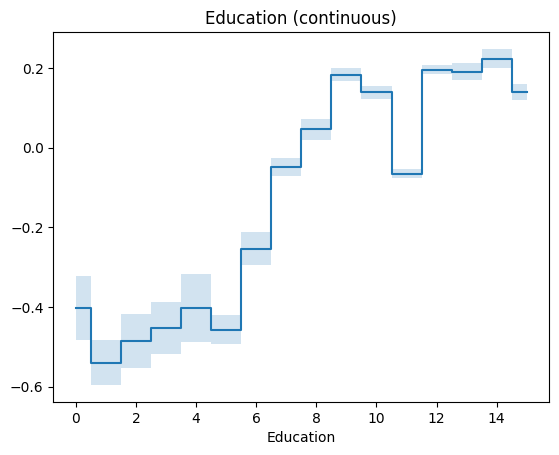

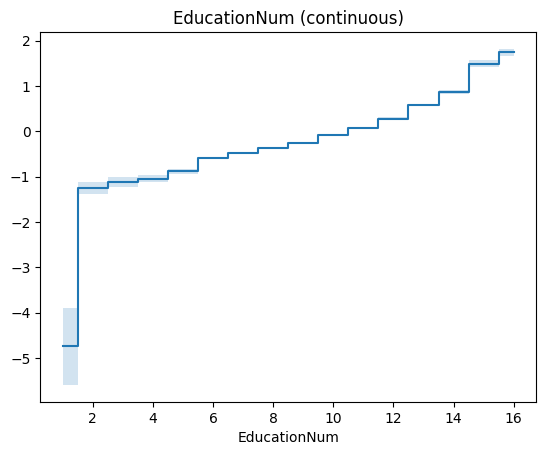

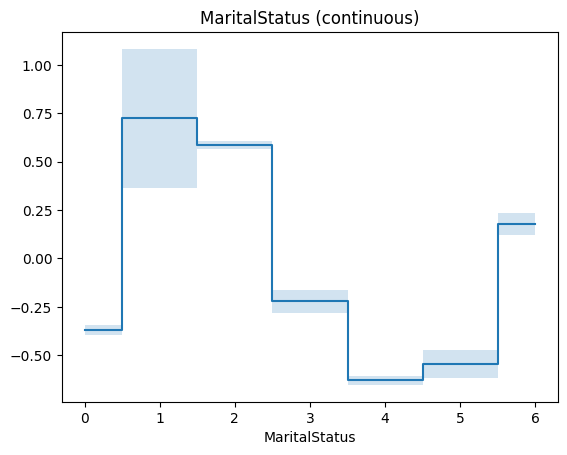

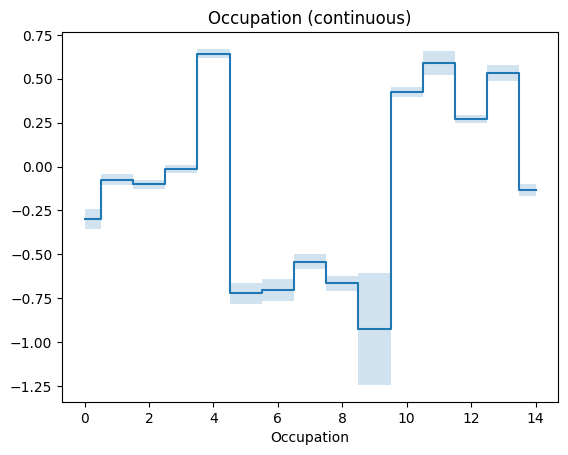

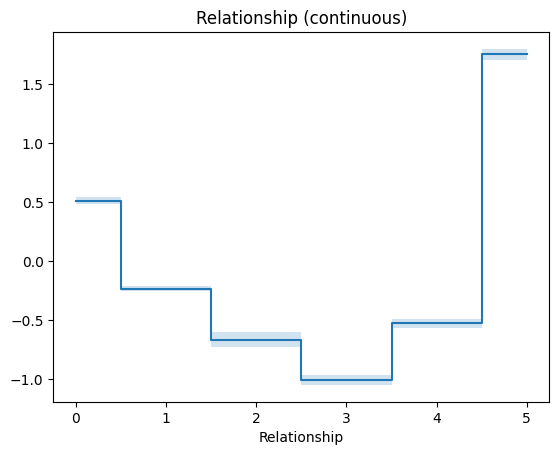

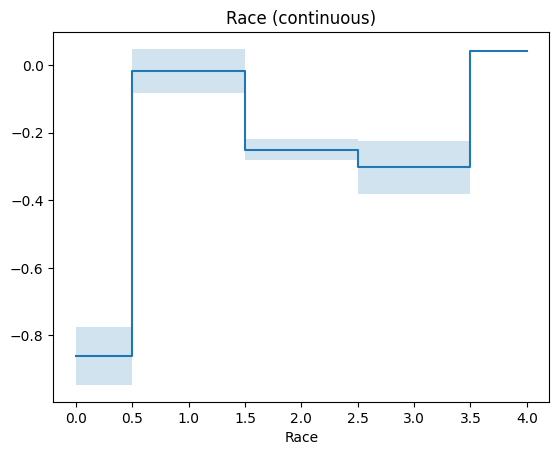

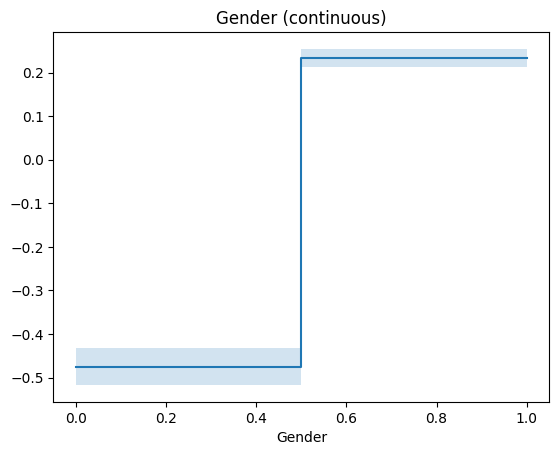

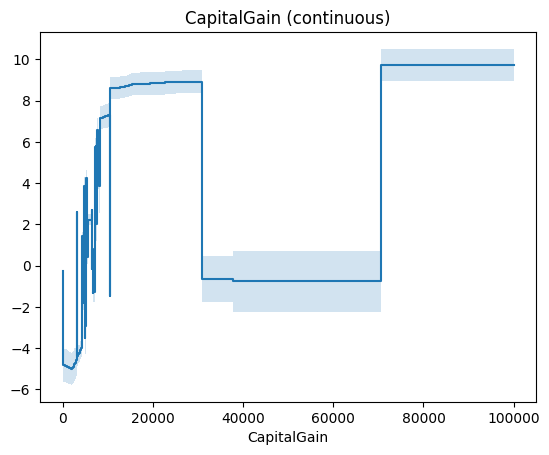

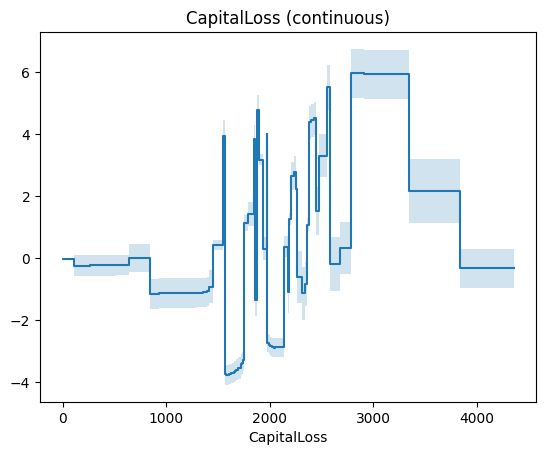

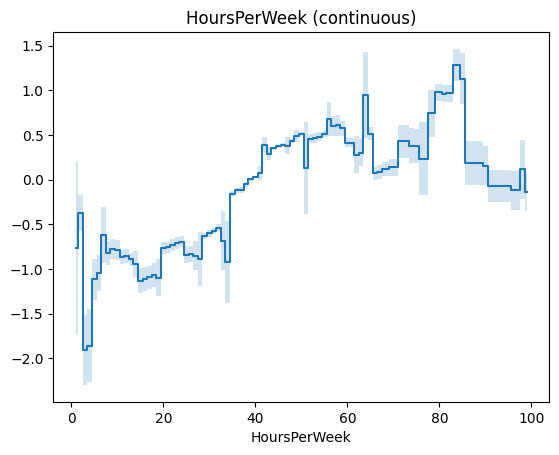

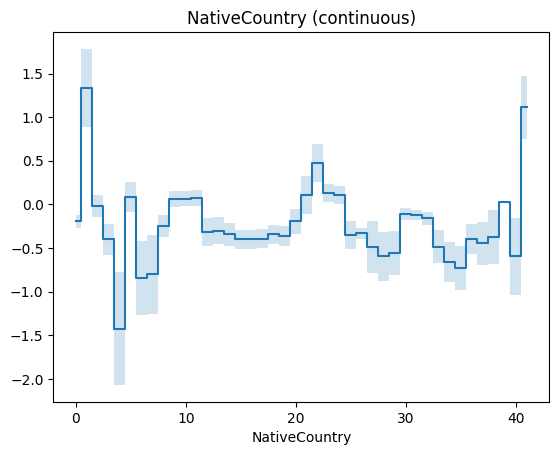

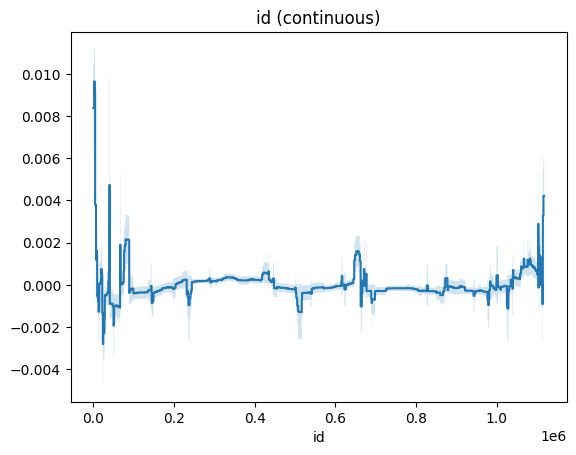

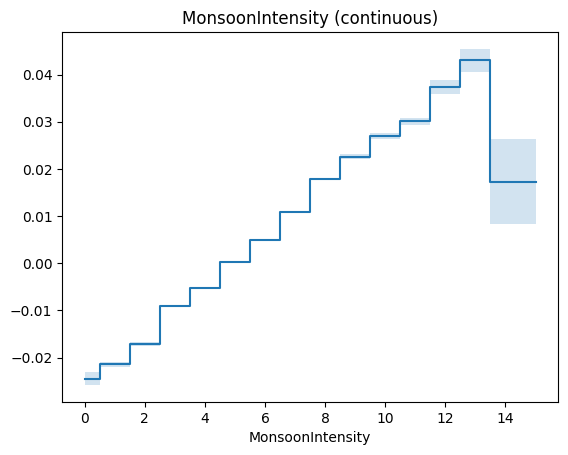

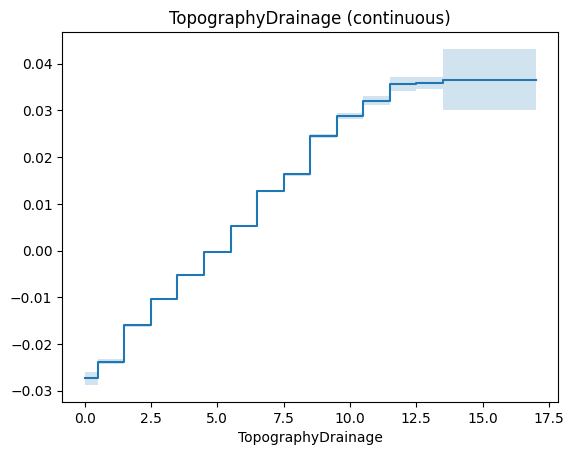

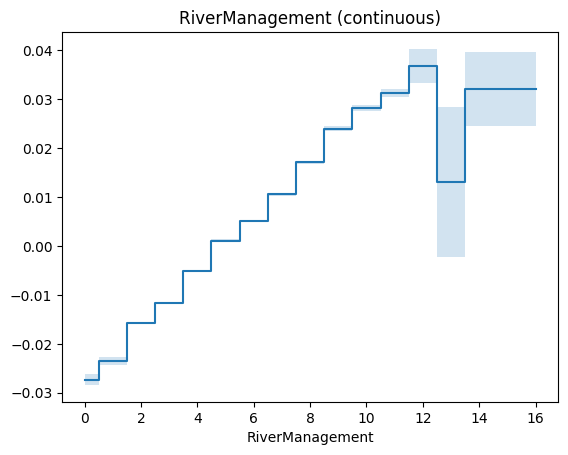

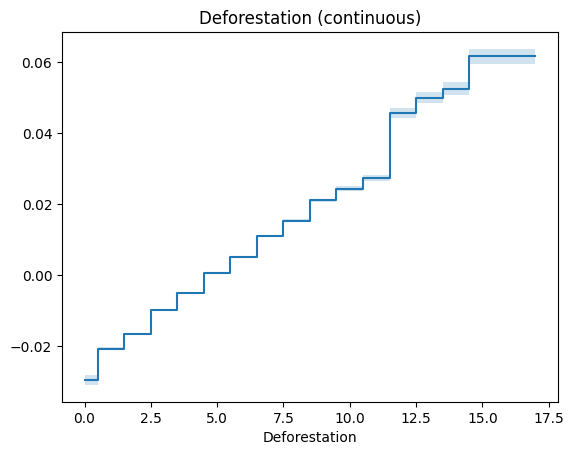

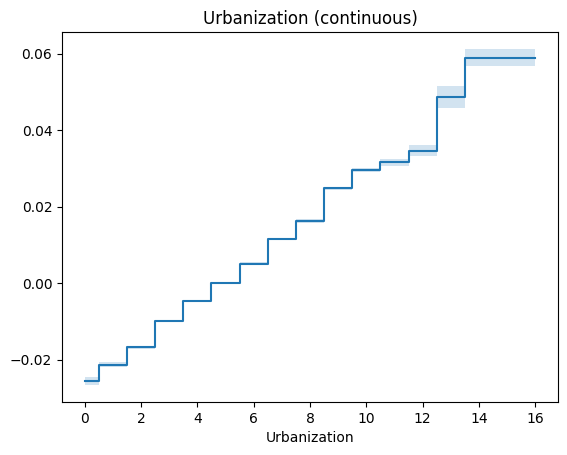

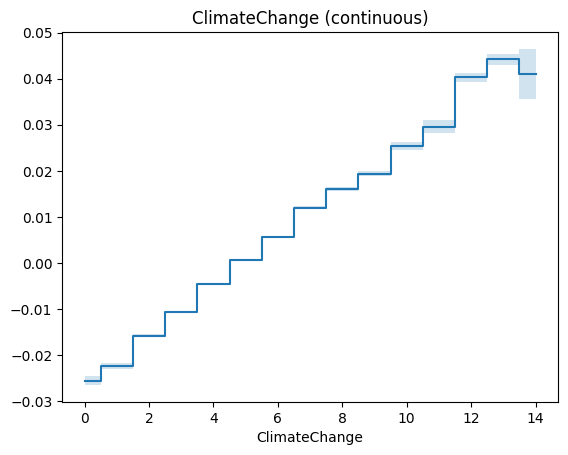

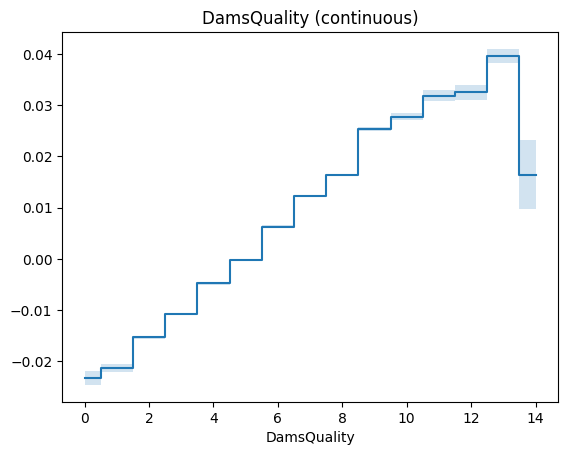

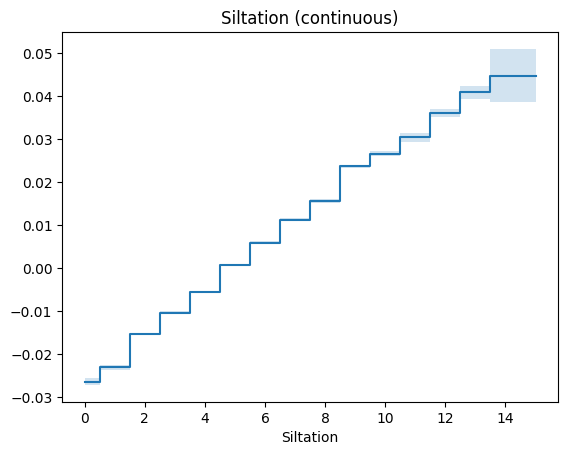

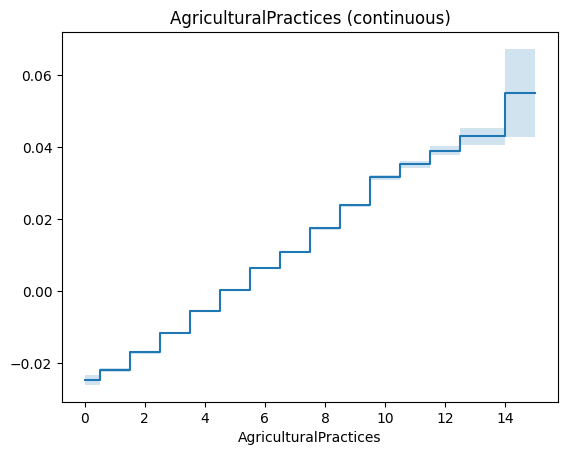

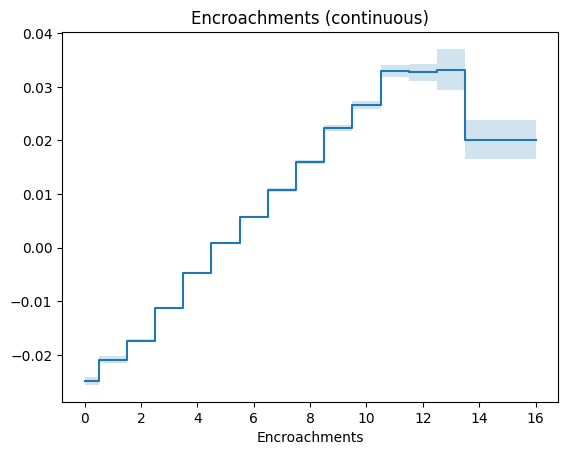

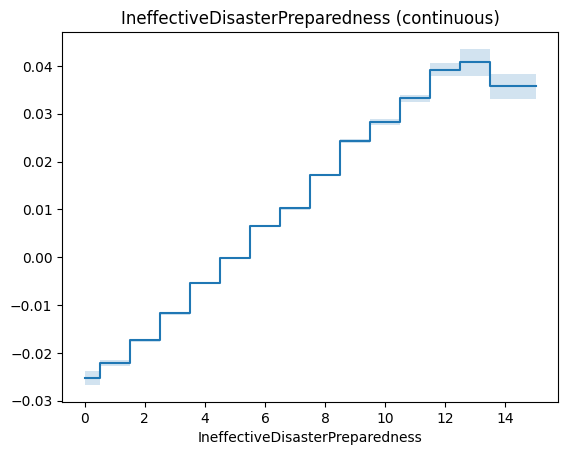

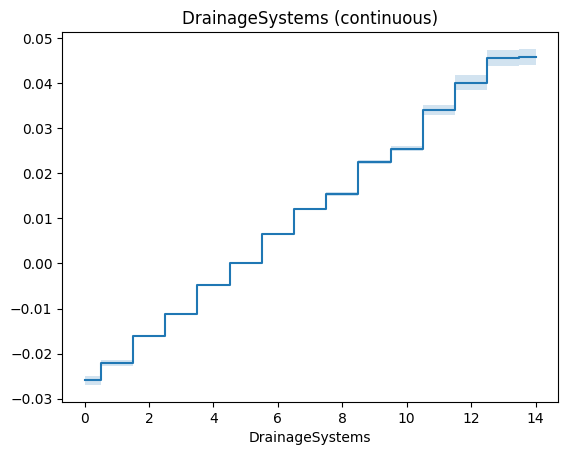

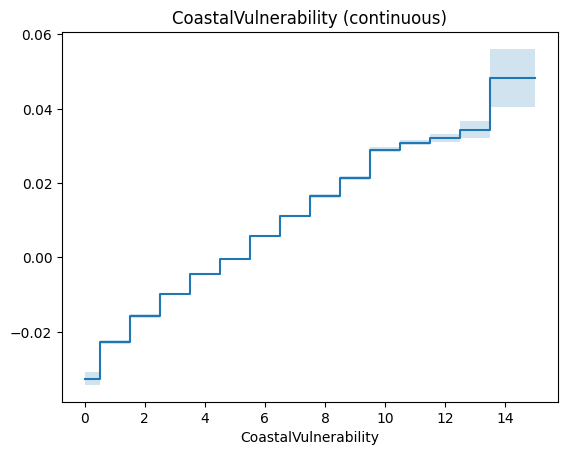

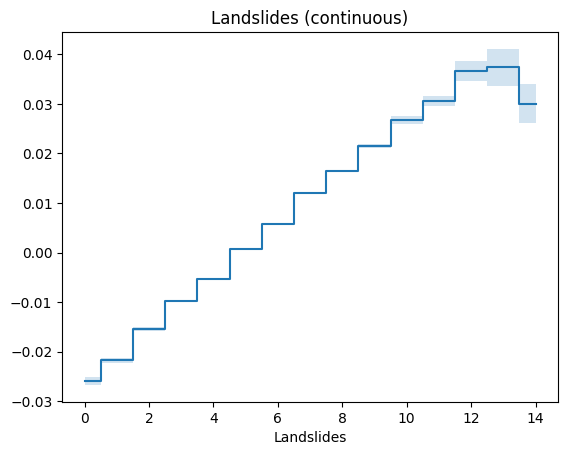

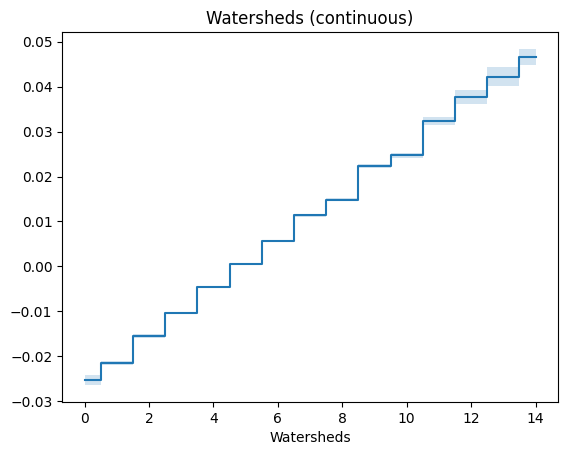

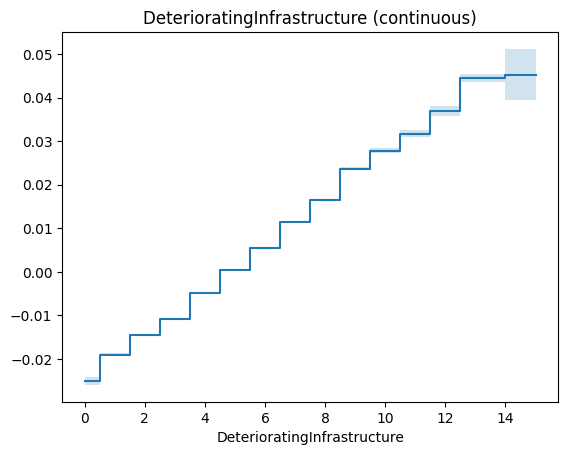

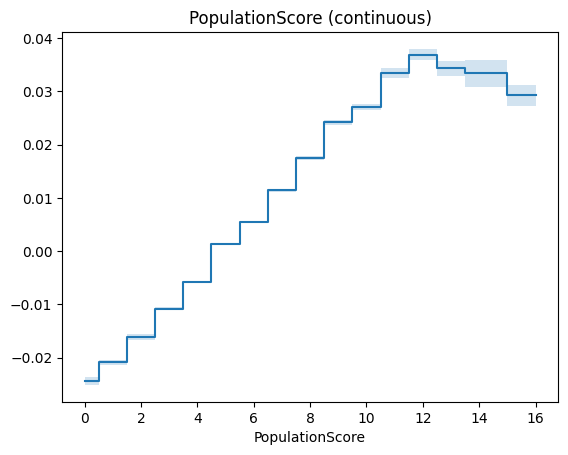

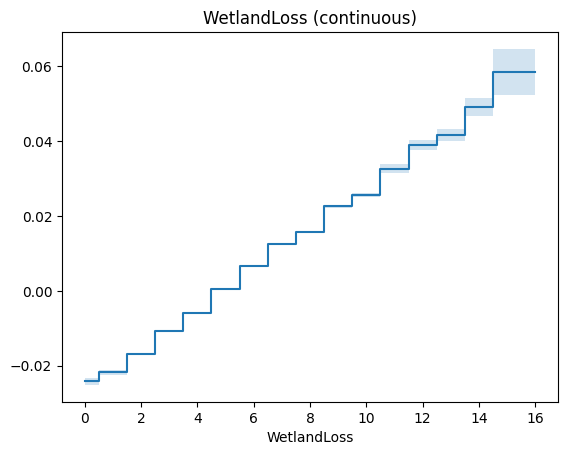

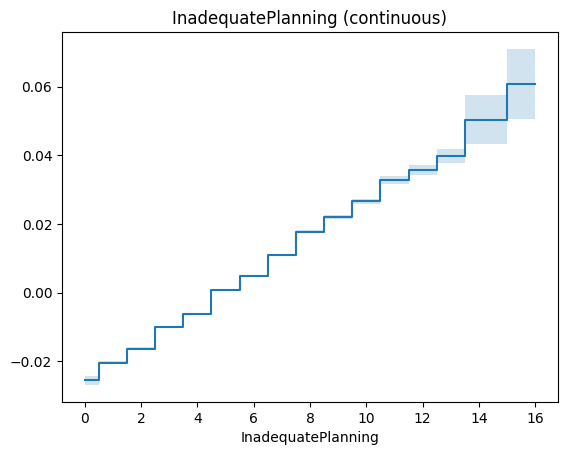

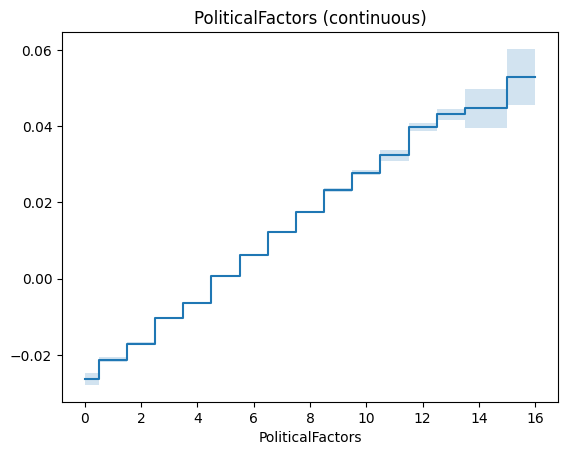

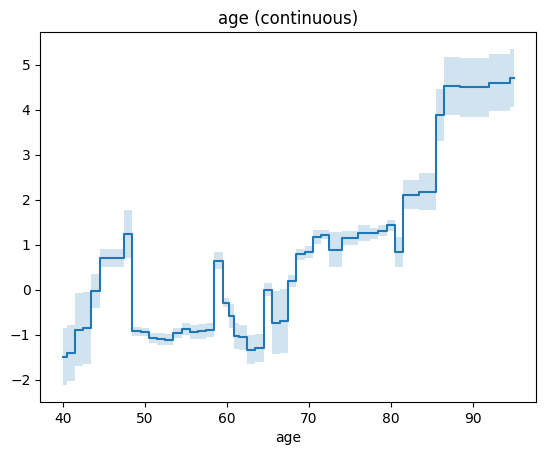

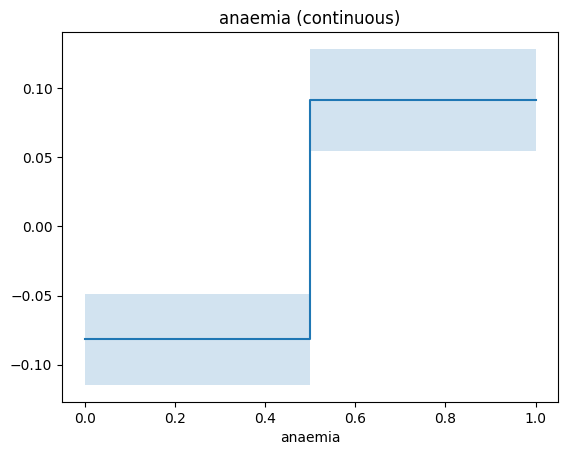

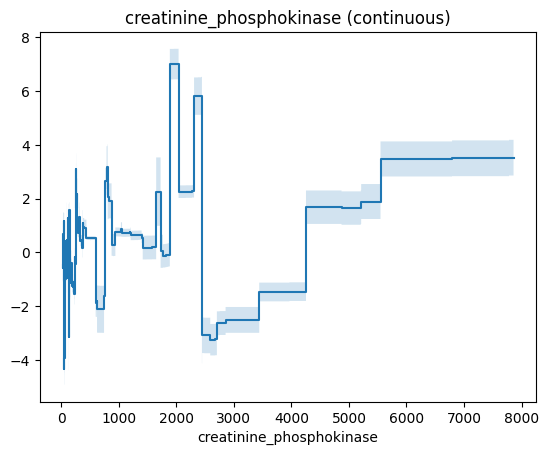

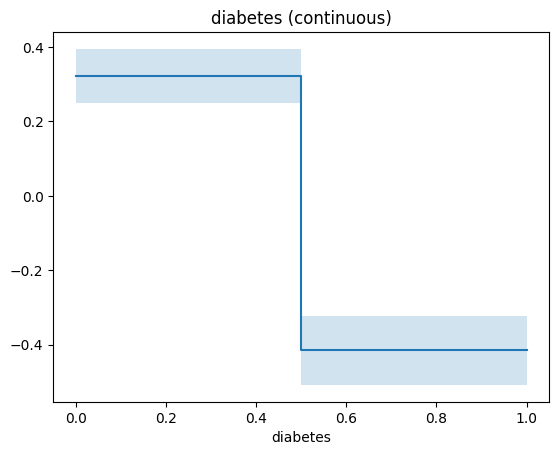

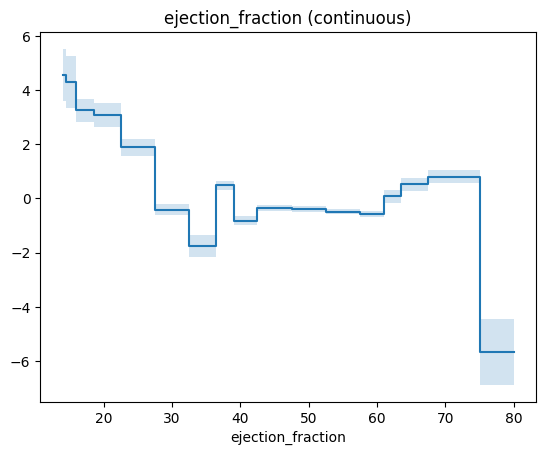

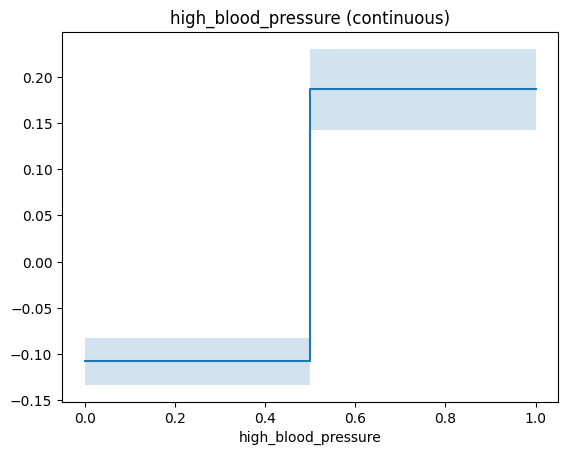

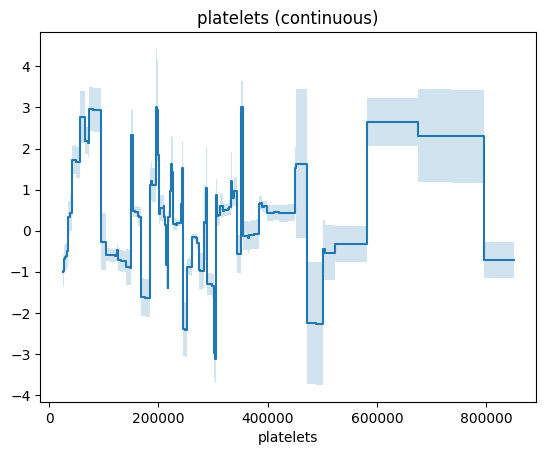

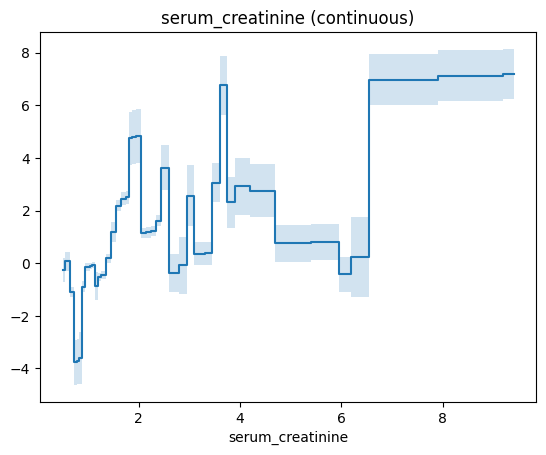

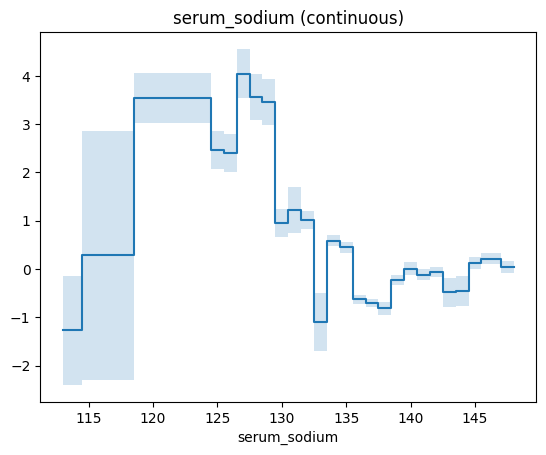

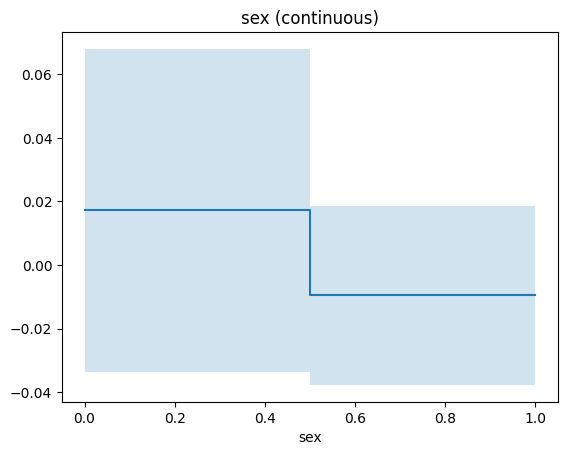

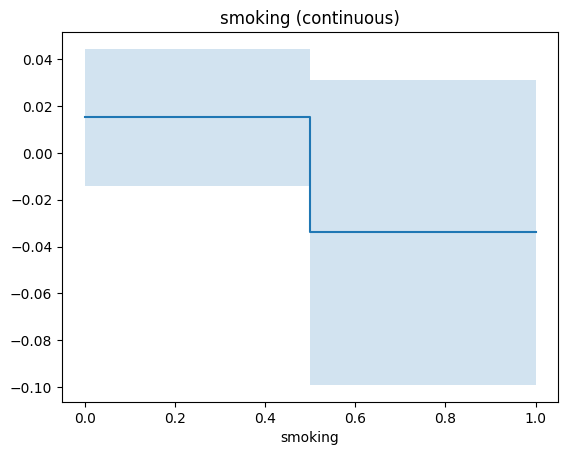

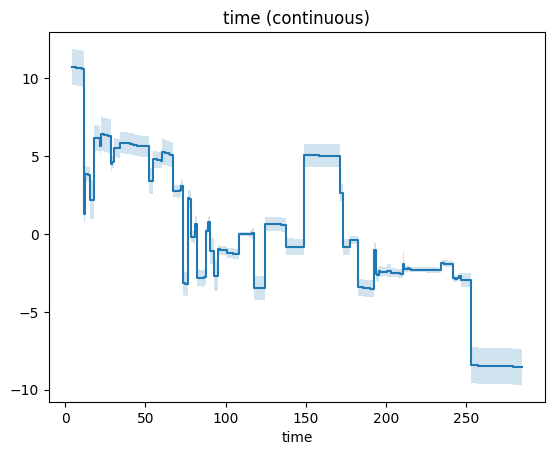

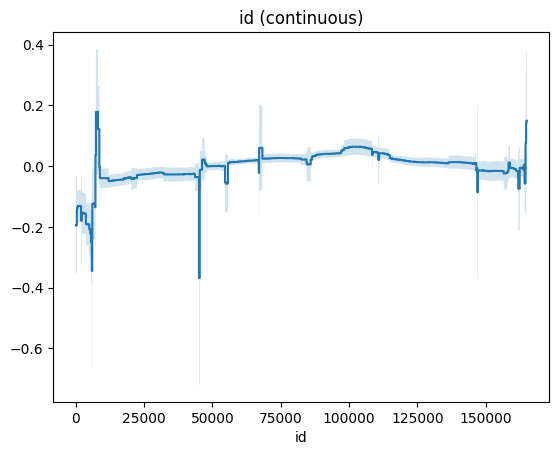

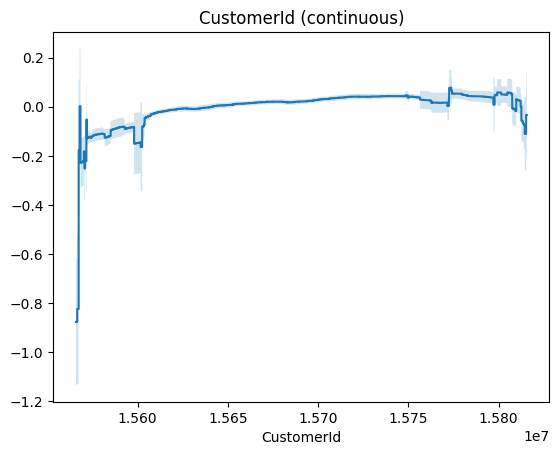

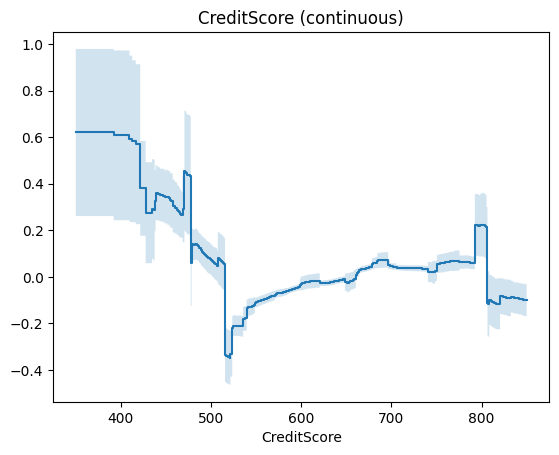

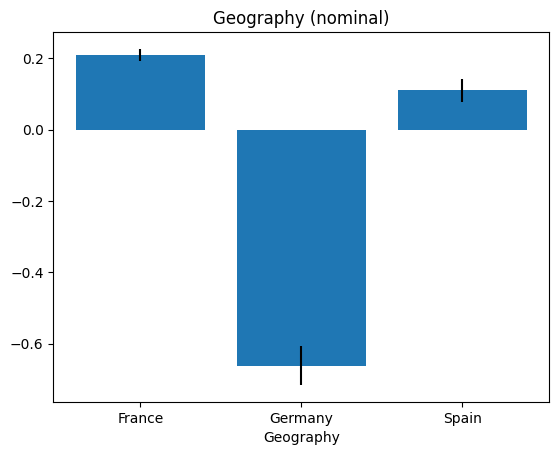

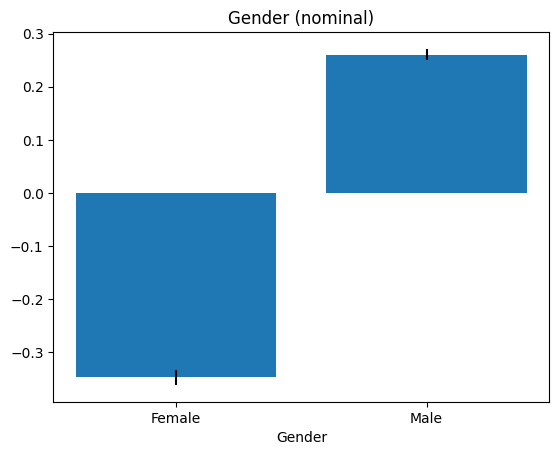

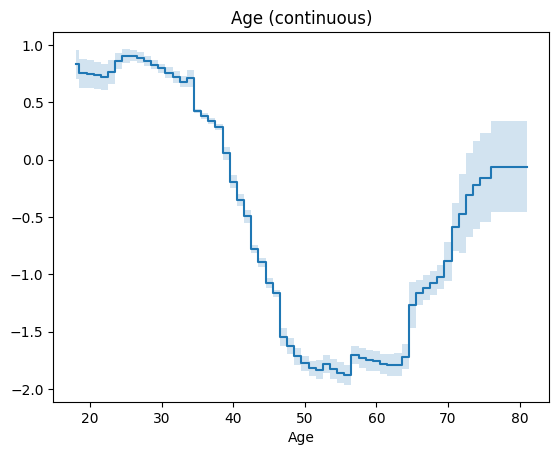

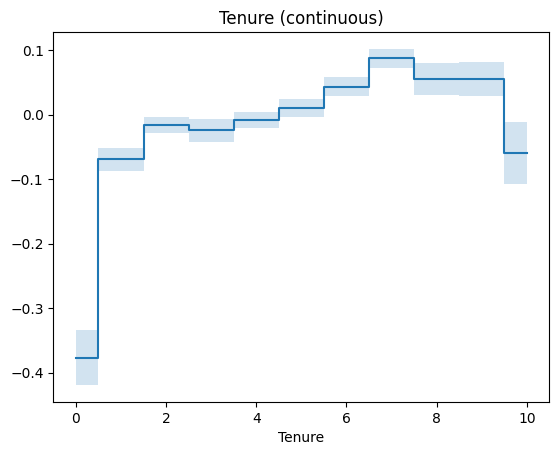

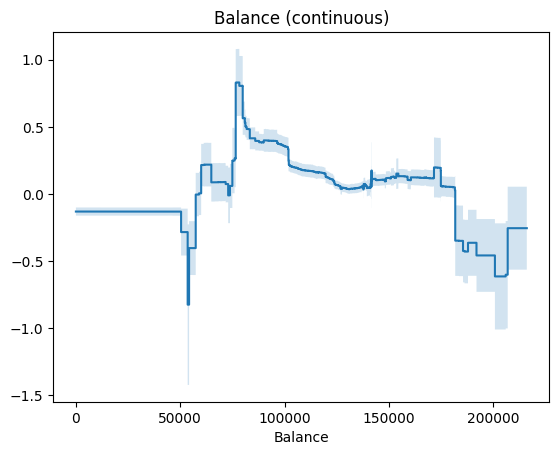

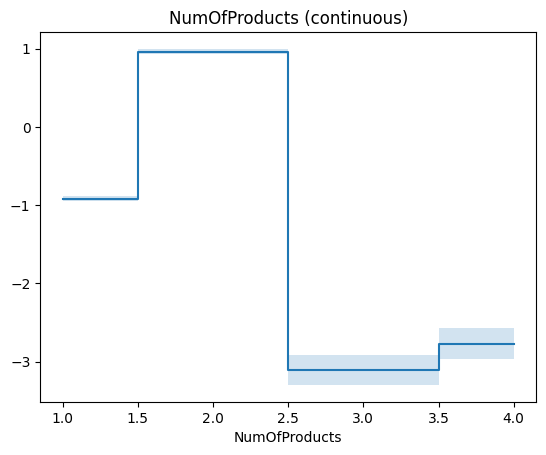

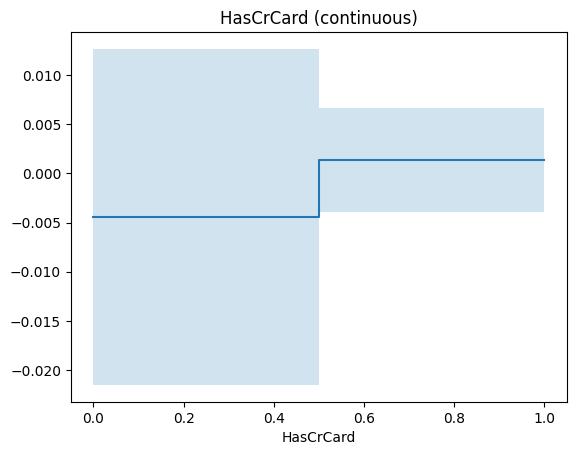

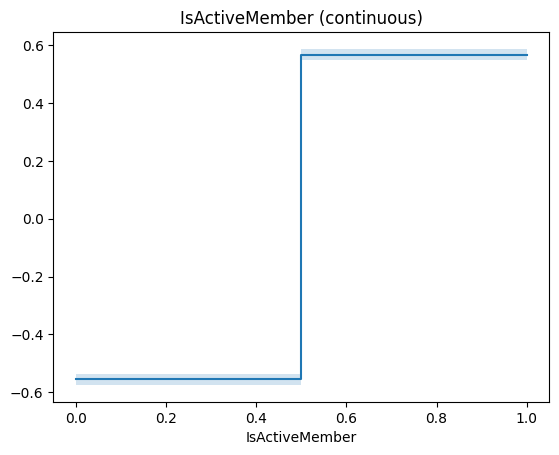

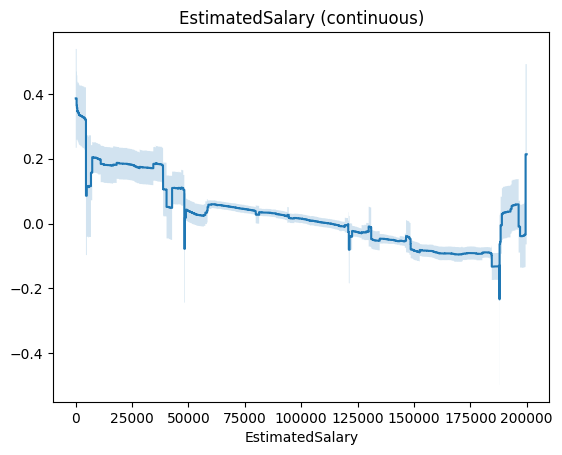

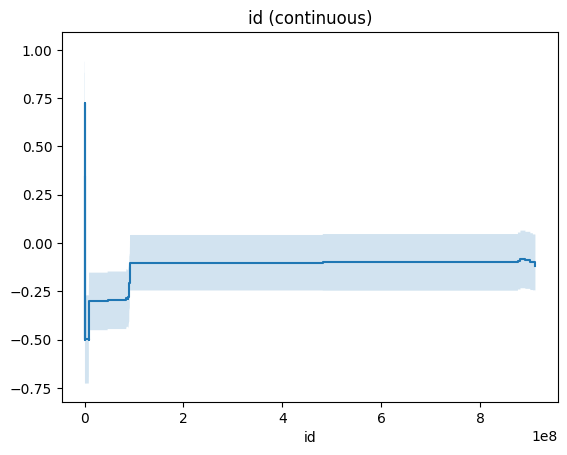

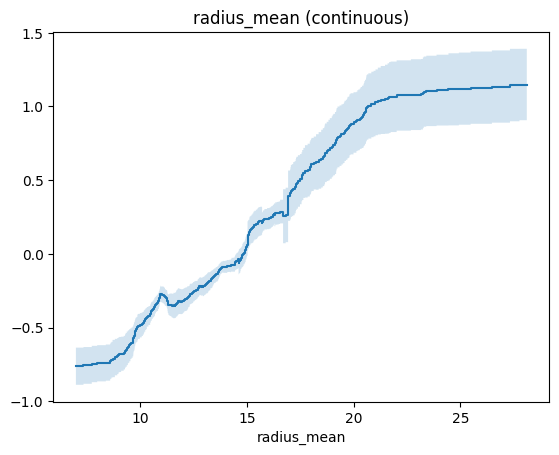

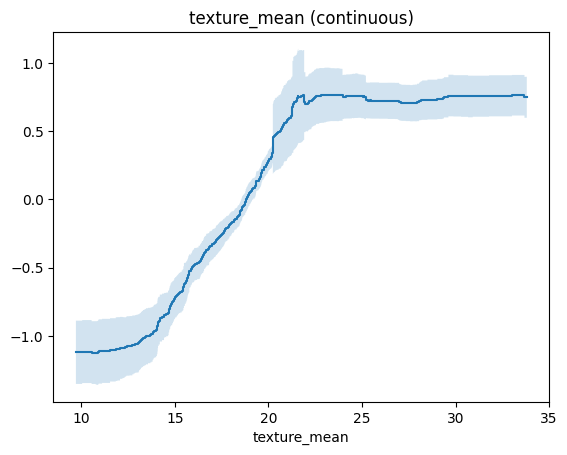

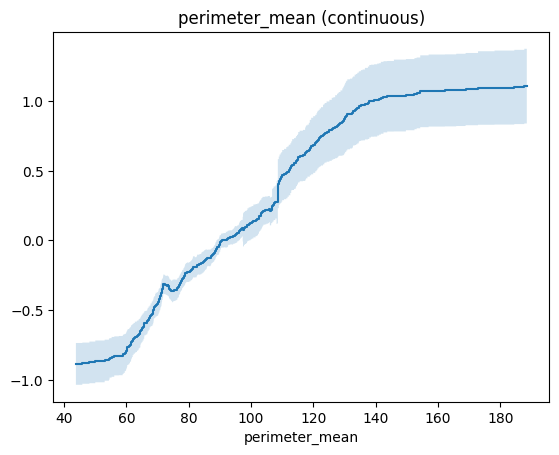

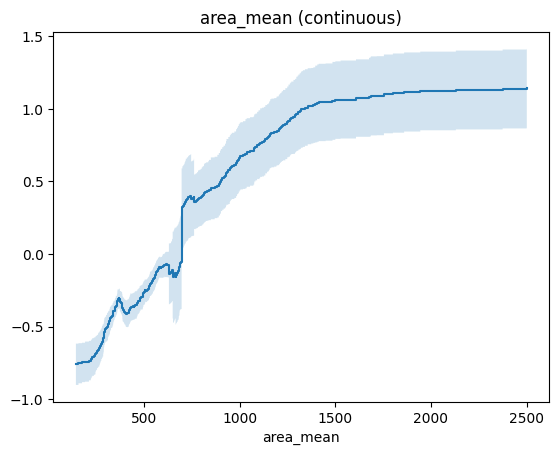

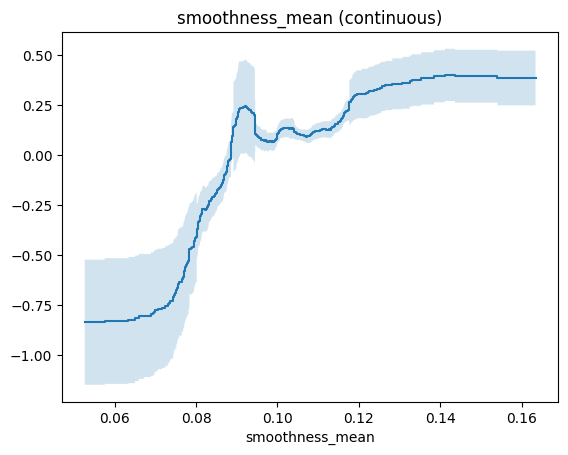

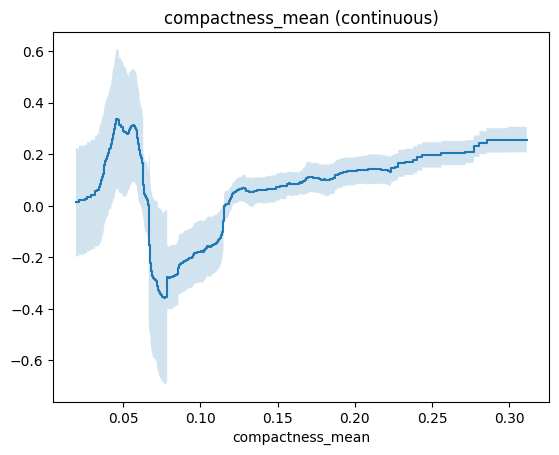

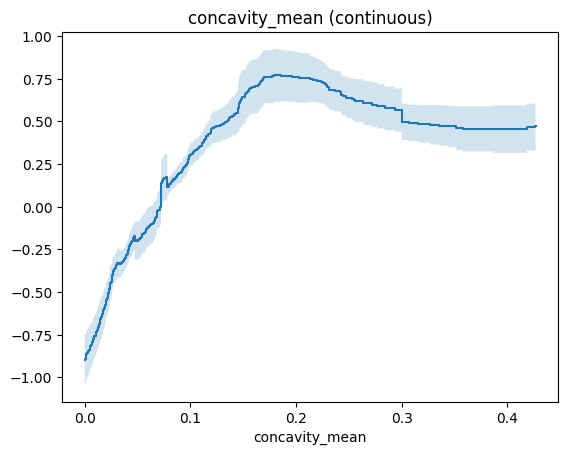

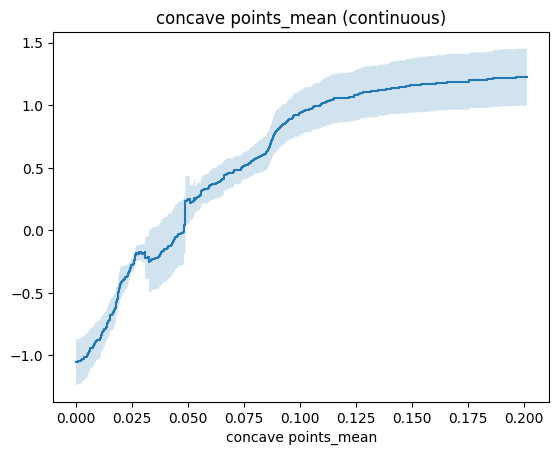

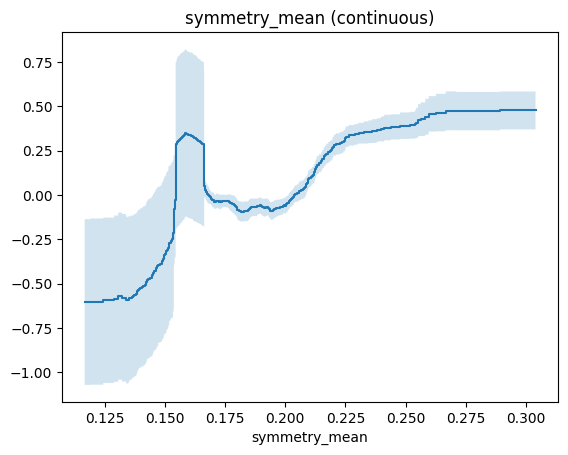

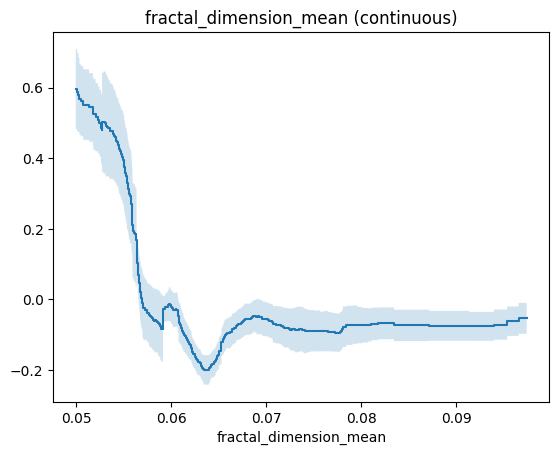

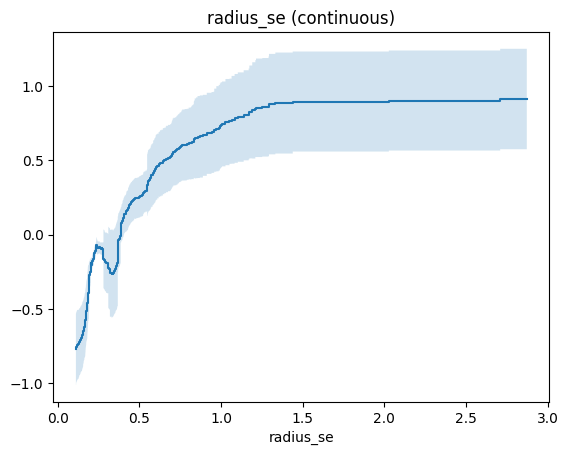

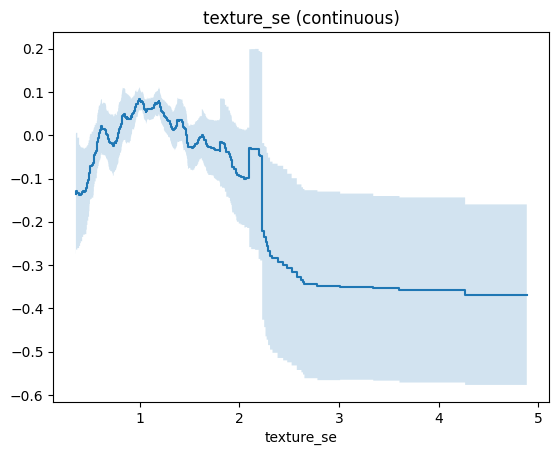

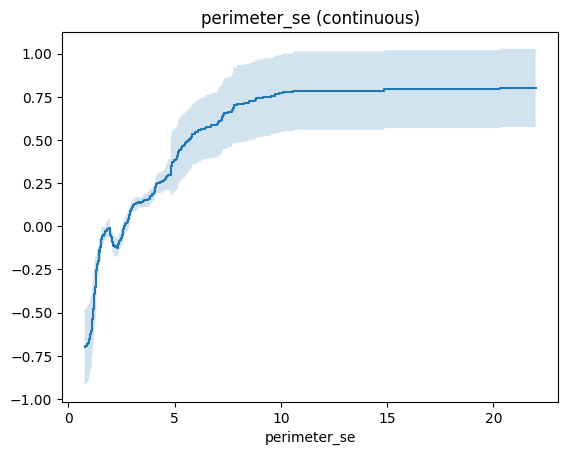

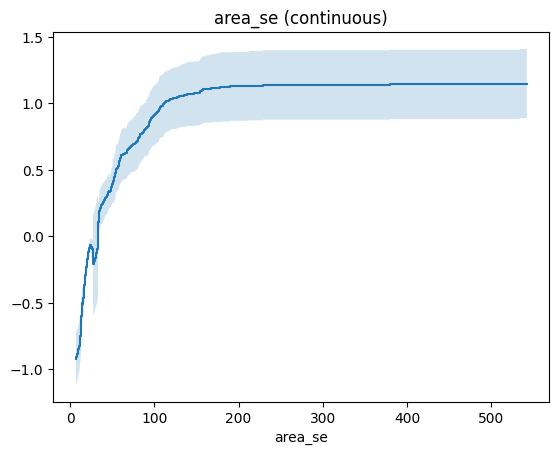

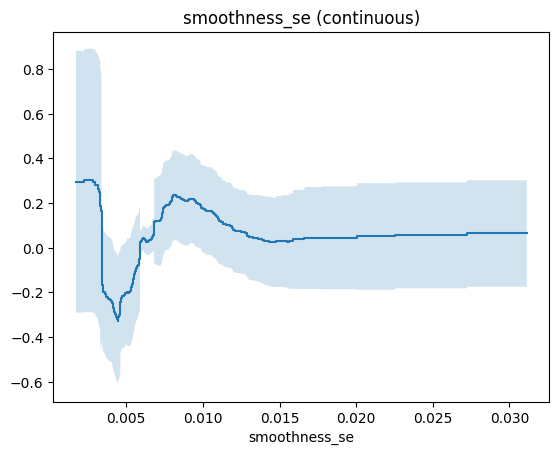

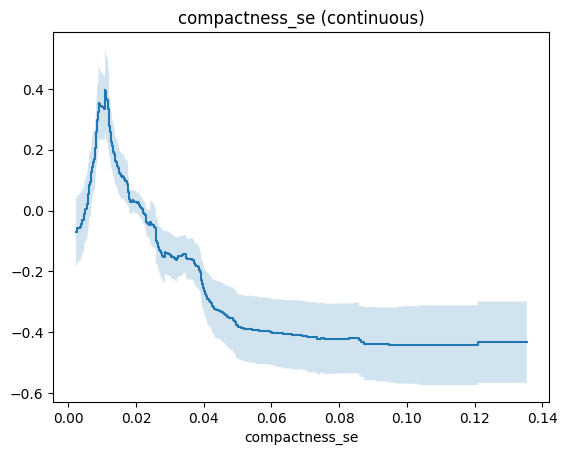

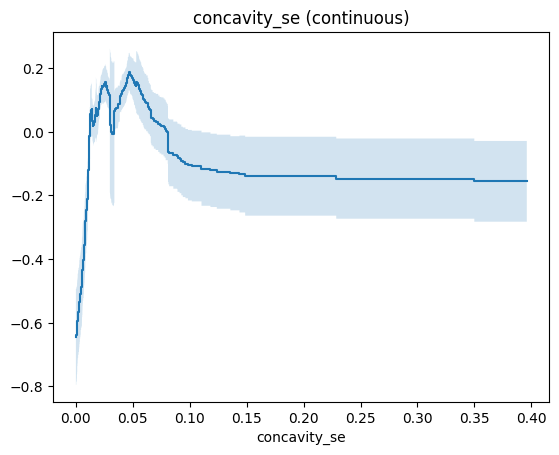

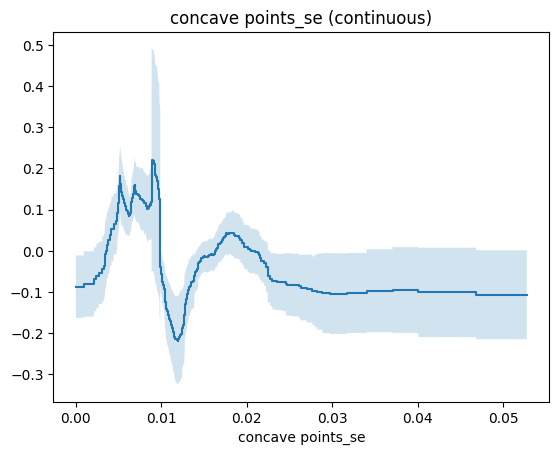

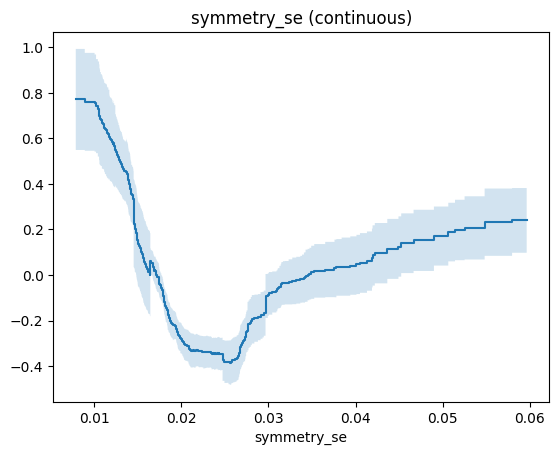

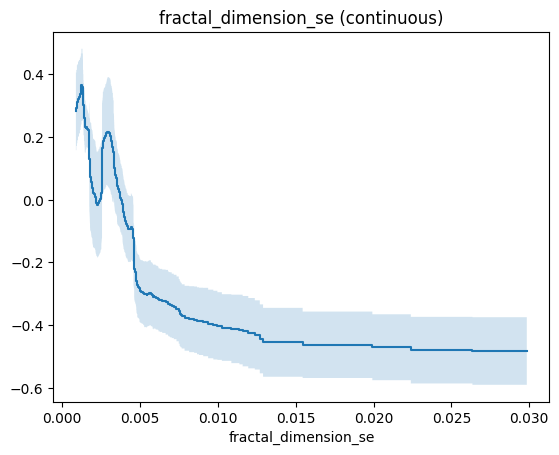

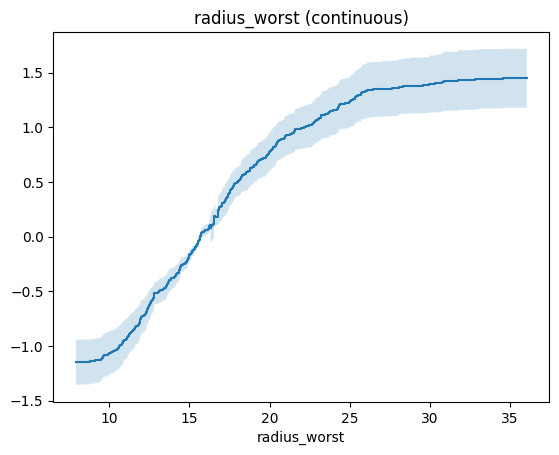

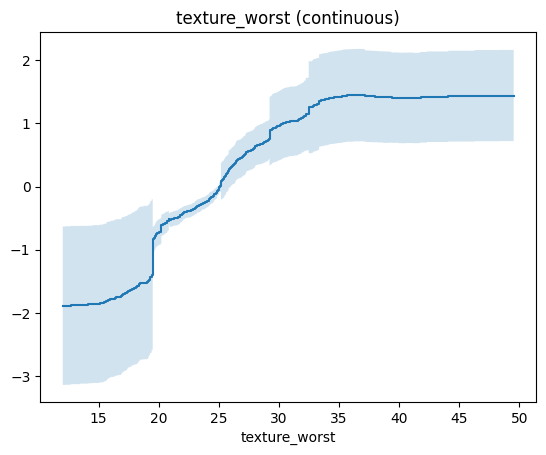

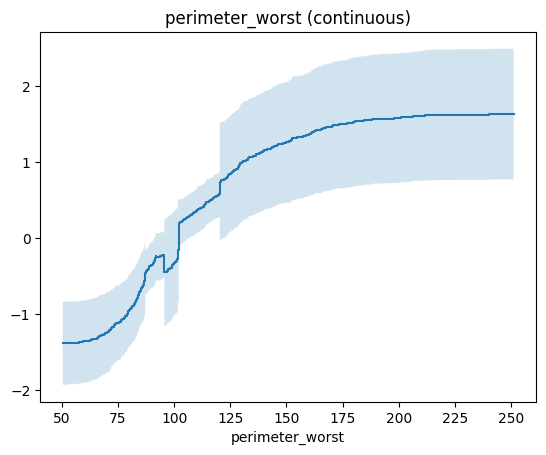

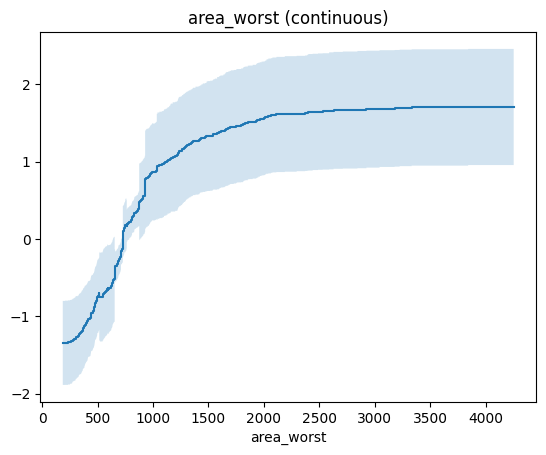

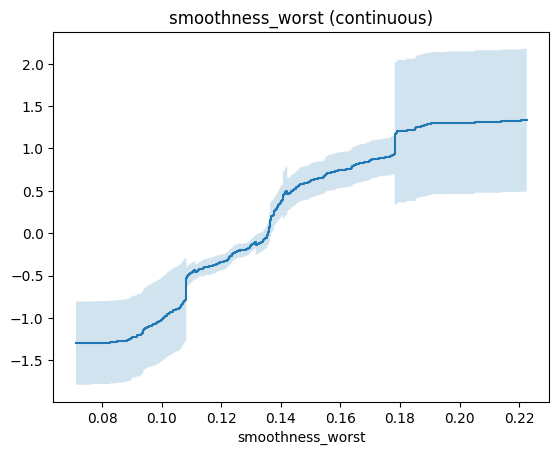

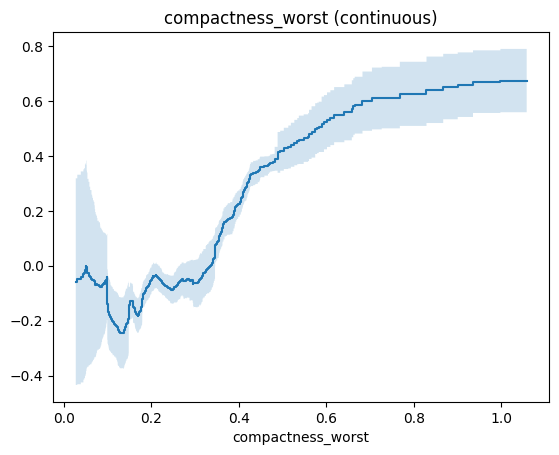

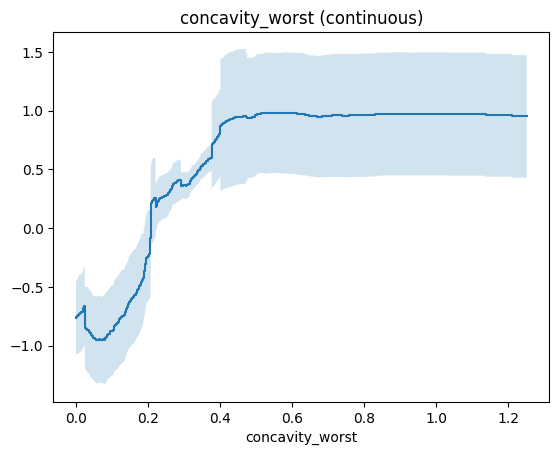

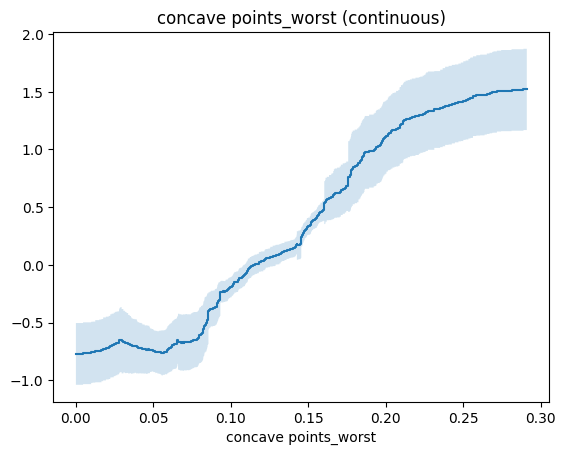

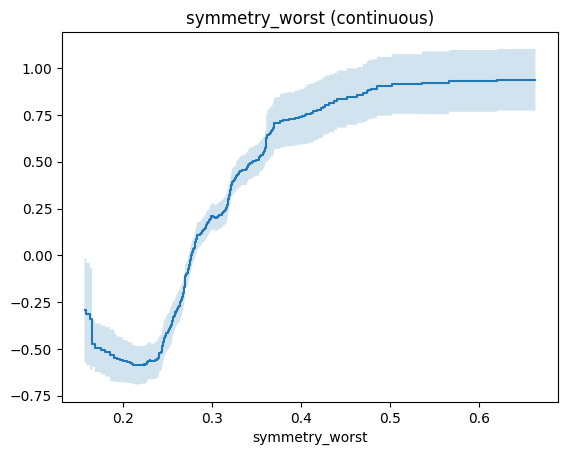

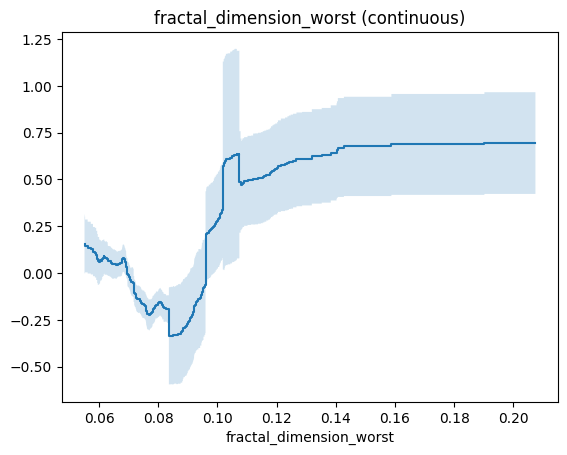

In [4]:
n_graphs = 0
for dataset_name in benchmark_utils.get_avaialble_datasets():
    ebm = benchmark_utils.get_ebm(dataset_name)
    _, _, _, _, feature_names = benchmark_utils.get_dataset(dataset_name)
    for feature_idx, feature_name in enumerate(feature_names):
        graph = graphs.extract_graph(ebm, feature_idx)
        #if graph.feature_type == "continuous":
        print(dataset_name, feature_name)
        graphs.plot_graph(graph)
        n_graphs += 1

In [5]:
# the total number of graphs
n_graphs

128

### extract graphs as text

In [12]:
all_graphs = []
for dataset_name in benchmark_utils.get_avaialble_datasets():
    ebm = benchmark_utils.get_ebm(dataset_name)
    _, _, _, _, feature_names = benchmark_utils.get_dataset(dataset_name)
    for feature_idx, feature_name in enumerate(feature_names):
        graph = graphs.extract_graph(ebm, feature_idx)
        if graph.feature_type == "continuous":
            graph = graphs.simplify_graph(graph, 0.05)
        graph_as_text = graphs.graph_to_text(graph, max_tokens=10000)
        all_graphs.append((graph, graph_as_text))
        print(graph_as_text)

This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: longitude
Feature Type: continuous
Means: {"(-124.35, -124.10499999999999)": -50430.1, "(-124.10499999999999, -124.08500000000001)": -38925.6, "(-124.08500000000001, -124.07499999999999)": -23742.3, "(-124.07499999999999, -123.3)": -12526.0, "(-123.3, -122.955)": -1690.2, "(-122.955, -122.66499999999999)": 19040.8, "(-122.66499999999999, -122.60499999999999)": 29856.3, "(-122.60499999999999, -122.58500000000001)": 44315.6, "(-122.58500000000001, -122.555)": 75515.2, "(-122.555, -122.455)": 86444.1, "(-122.455, -122.445)": 99533.8, "(-122.445, -122.42500000000001)": 112351.5, "(-122.42500000000001, -122.405)": 89733.4, "(-122.405, -122.39500000000001)": 78586.0, "(-122.39500000000001, -122.375)": 46429.6, "(-122.375, -122.36500000000001)": 35622.6, "(-122.36500000000001, -122.305)": 20538.8, "(-122.305, -122.155)": 6386.6, "(-122.155,

In [13]:
# save the graphs (pickle)
import pickle
with open("all_graphs.pkl", "wb") as f:
    pickle.dump(all_graphs, f)